> ## Project 3:  Micro Credit Defaulter
By : Yashshree Baviskar

Internship Batch: 25

## Micro-Credit Defaulter Model

### **Problem Statement:**

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 





## Importing require library for performing EDA, Data Wrangling and data cleaning

In [2]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset CSV file using pandas
df= pd.read_csv("Data file.csv")

In [4]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows : 209593
No. of Columns : 37


,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


- In this dataset *label* is our target column, we have to predict the probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. 
- In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

So clearly it's a **Classification problem**.

#### **Dataset information:**

- **label** : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- **msisdn** : mobile number of user
- **aon** : age on cellular network in days
- **daily_decr30** : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- **daily_decr90** : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- **rental30** : Average main account balance over last 30 days
- **rental90** : Average main account balance over last 90 days
- **last_rech_date_ma** : Number of days till last recharge of main account
- **last_rech_date_da**: Number of days till last recharge of data account
- **last_rech_amt_ma** : Amount of last recharge of main account (in Indonesian Rupiah)
- **cnt_ma_rech30** : Number of times main account got recharged in last 30 days
- **fr_ma_rech30** : Frequency of main account recharged in last 30 days
- **sumamnt_ma_rech30** : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- **medianamnt_ma_rech30** : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- **medianmarechprebal30** : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- **cnt_ma_rech90** : Number of times main account got recharged in last 90 days
- **fr_ma_rech90** : Frequency of main account recharged in last 90 days
- **sumamnt_ma_rech90** : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- **medianamnt_ma_rech90** : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- **medianmarechprebal90** : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- **cnt_da_rech30** : Number of times data account got recharged in last 30 days
- **fr_da_rech30**: Frequency of data account recharged in last 30 days
- **cnt_da_rech90** : Number of times data account got recharged in last 90 days
- **fr_da_rech90** : Frequency of data account recharged in last 90 days
- **cnt_loans30** : Number of loans taken by user in last 30 days
- **amnt_loans30** : Total amount of loans taken by user in last 30 days
- **maxamnt_loans30** : maximum amount of loan taken by the user in last 30 days
- **medianamnt_loans30** : Median of amounts of loan taken by the user in last 30 days
- **cnt_loans90** : Number of loans taken by user in last 90 days
- **amnt_loans90** : Total amount of loans taken by user in last 90 days
- **maxamnt_loans90** : maximum amount of loan taken by the user in last 90 days
- **medianamnt_loans90** : Median of amounts of loan taken by the user in last 90 days
- **payback30** : Average payback time in days over last 30 days
- **payback90** : Average payback time in days over last 90 days
- **pcircle** : telecom circle
- **pdate** : date

> ### **Data Cleaning & Preprocessing:**

In [5]:
# As we have 37 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Unnamed: 0', 'label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn', 'pcircle', 'pdate']}

#### Observation:
- **This dataset contain 209593 rows and 37 columns.**
- **we have all 3 types of data in dataset they are integer, float and object.**
- **pdate should be a datetime datatype so we have to change it from object to datetime datatype.**
- **'Unnamed:0' is a index feature in raw dataset so we can drop it here itself.**

In [6]:
df.drop(["Unnamed: 0"],axis=1, inplace =True)

### Data Integrity Check

In [7]:
#Checking null values in the dataset
df.isnull().sum().any()

False

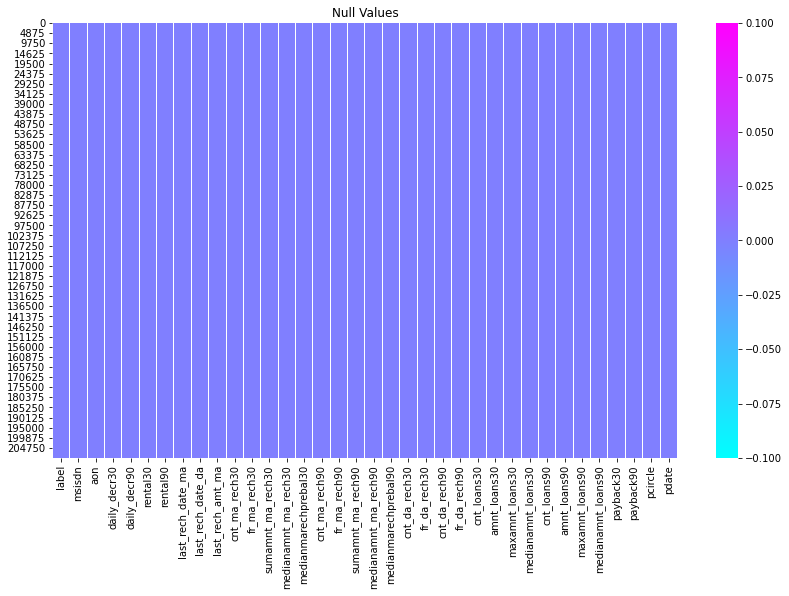

In [8]:
#Visualizeing null values
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(), cmap='cool')
plt.title("Null Values")
plt.show()

**No Missing value present in dataset.**

**Yes To Go Further !!!**

In [9]:
df.duplicated().sum() # This will check the duplicate data for all columns.

1

In [10]:
df.duplicated('msisdn').sum()  # This will check the duplicate data for all columns.

23350

- **There 23350 rows with duplicate mobile number.** 
- **There 1 row with completely duplicate values of all features.**

**<u>Training model on duplicate data will inflate accuracy model and additional it will increase computational resources consumption and computational time</u>.**

- ***For eariler 23350 entry it can possible that same mobile number is switch to other customer and another observation is for these duplicate entries features values are different.***

- ***We will drop 1 row duplicate entry before going further.***

In [11]:
# Droping duplicate entries
df.drop_duplicates(keep='last',inplace=True)

In [12]:
df.shape

(209592, 36)

In [13]:
df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

#### Observation:
- pcircle has only one entry throughout so it will have no contribution with our model training we can drop this feature. 
- msisdn is a feature with phone numbers of users so this feature has no contribution on model building.

In [14]:
# Droping Unnamed: 0, msisdn and pcircle column
df.drop(["msisdn"],axis=1, inplace =True)
df.drop(["pcircle"],axis=1, inplace =True)

### **Feature Extraction**

- **We will perform simple feature engineering on 'pdate' column to create new columns for day,month and year.**

In [15]:
# Converting Date datatypes and spliting date into date, month and year.
df['pdate']=pd.to_datetime(df['pdate'])
df['Day']=df['pdate'].apply(lambda x:x.day)
df['Month']=df['pdate'].apply(lambda x:x.month)
df['Year']=df['pdate'].apply(lambda x:x.year)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Day,Month,Year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,20,7,2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,10,8,2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,19,8,2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6,2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,22,6,2016


In [16]:
#Droping pdate column after extraction
df.drop(['pdate','Year'],axis=1,inplace=True)

## Statistical Matrix

In [17]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
label,209592.000000,0.875177,0.330519,0.000000,1.000000,1.000000,1.000000,1.000000
aon,209592.000000,8112.380399,75696.261220,-48.000000,246.000000,527.000000,982.000000,999860.755168
daily_decr30,209592.000000,5381.412999,9220.644093,-93.012667,42.439500,1469.091833,7244.096000,265926.000000
daily_decr90,209592.000000,6082.529123,10918.836919,-93.012667,42.691917,1500.000000,7802.795000,320630.000000
rental30,209592.000000,2692.578912,4308.596841,-23737.140000,280.417500,1083.540000,3356.945000,198926.110000
rental90,209592.000000,3483.407309,5770.475034,-24720.580000,300.260000,1334.000000,4201.792500,200148.110000
last_rech_date_ma,209592.000000,3755.865715,53906.020204,-29.000000,1.000000,3.000000,7.000000,998650.377733
last_rech_date_da,209592.000000,3712.220632,53374.960145,-29.000000,0.000000,0.000000,0.000000,999171.809410
last_rech_amt_ma,209592.000000,2064.458973,2370.790003,0.000000,770.000000,1539.000000,2309.000000,55000.000000
cnt_ma_rech30,209592.000000,3.978053,4.256099,0.000000,1.000000,3.000000,5.000000,203.000000


#### Observation:
- **For all features value of mean is greater than median, indicating skewness in features.**
- **All data belong to year 2016. We can drop year column.**
- **pcircle contain single unique value UPW, so we can drop this feature.**
- **The features aon, daily_decr30, daily_decr90 ,rental30, rental30, last_rech_date_ma, last_rech_date_da, cnt_da_rech30, fr_da_rech30, last_rech_amt_ma, maxamnt_loans30, cnt_loans90, payback30, payback90 contain outliers as there are lot difference in max columns and 75% columns.**
- **aon, daily_decr30, daily_decr90 ,rental30, rental30, last_rech_date_ma, last_rech_date_da, medianmarechprebal90, medianmarechprebal30 features contain negative values in minimum column.**
- **Maximum aon (age on cellular network in days) observed is 999860.755168 and the minimum is -48.**


#### Data Cleaning 

**Here we will  dealing with  the features which having negative values.**

### aon negative values

In [18]:
df['aon'].describe()

count    209592.000000
mean       8112.380399
std       75696.261220
min         -48.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755168
Name: aon, dtype: float64

In [19]:
999860/365

2739.3424657534247

In [20]:
df[df['aon']<0].value_counts().sum()

1539

In [21]:
df[df['aon'] > 3650].value_counts().sum()  # Assume people stay one network for 10 years.

2089

***There are some negative values in minimum column while there is lot of difference between 75% and max column.Max values is 999860days which means 2739.34 year which is not possible at all.***

***There are 1539 entries with value less than 0.***

***So Feature aon contain error. To resolve this error we are going to handle upper limit through outlier removal.***


### There are lot of features which have negative values and higher max value compare to 75 percentile.There is need of some kind common Strategy to handle them based on certain assumption.

### Strategy to handle data error in min and max column.
- **Assumption- All negative values are typing error happen accidentally by type - in front of original value (except feature depicting median).**
    - **Negative values are converted into absolute value to correct negative typing error whenever applicable except feature depicting median.**
    - **Upper limit of these features handle by outlier removal.**

### Now we will convert all negative values into absolute values.

In [22]:
#Converting all negative values to positive values in above columns
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_da']=abs(df['last_rech_date_da'])

**We have successfully converted negative data into positive data.**

### Another data error contain in maxamnt_loans30 column

**maxamnt_loans30** : maximum amount of loan taken by the user in last 30 days

In [23]:
df['maxamnt_loans30'].describe()

count    209592.000000
mean        274.660029
std        4245.274734
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max       99864.560864
Name: maxamnt_loans30, dtype: float64

**We already know maximum loan amount taken by customers can be 0,5,10 and which can be repay with amount of 0,6,12. We gone replace values greater than 12 into category of zero.**

**<u>We are making assumption here that loan amount greater than 12 to be replace with zero.</u>**

In [24]:
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0)
       & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0

# marking values greater than 12 and assign value zero to them.

In [25]:
df['maxamnt_loans30'].value_counts()

6.0     179192
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

### Clearification on negative minimum values in 'medianmarechprebal30' and 'medianmarechprebal90'

**medianmarechprebal90** : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

**medianmarechprebal90** : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- **Comment** :
    - **The median of main account balance can be negative.**
    - **There are some very large positive values in the variable. These could be natural outliers.**

### Clearification on extreme max values in cnt_loans30 & cnt_loans90
**cnt_loans30** : Number of loans taken by user in last 30 days

**cnt_loans90** : Number of loans taken by user in last 90 days

- **Comment**:
    **There are no information about any restrictions on the number of times a customer can avail loans. Hence these extreme values can be considered as realistic.**

### Data is clean and error free now So we will import data in new CSV file and use new CSV file for further investigation.

#### Note :- Outliers will be removed in feature engineering section.

In [26]:
# Saving error free data to new CSV file with name Clean_data_file
df.to_csv('Clean_data_file.csv',sep=',',index=False)

**Importing Clean_data_file CSV file through pandas**

In [27]:
df=pd.read_csv('Clean_data_file.csv')

In [28]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows : 209592
No. of Columns : 35


,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


## EXPLORATIVELY DATA ANALYSIS

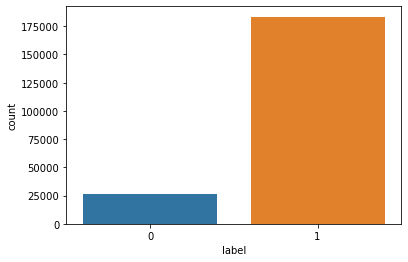

In [29]:
# Analysis of target value 'label' using plot to visualise % of  
sns.countplot(x='label', data=df);

There is a data imbalancing issue so we have to treat this by using oversampling or undersampling. 

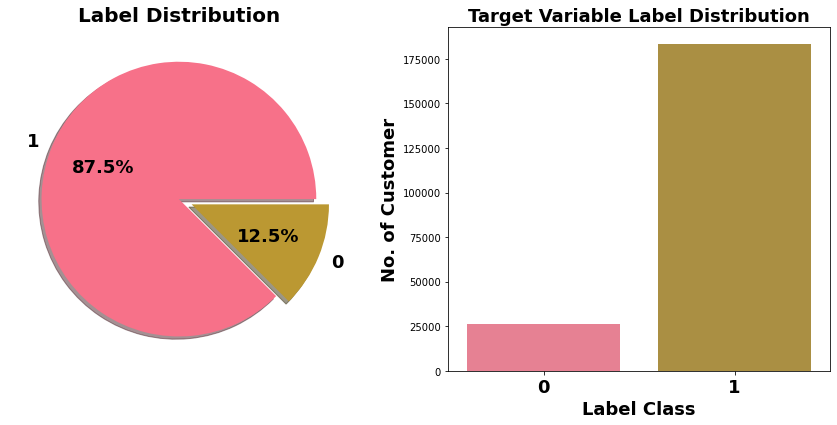

In [30]:
#Counting the number of defaulter and non-defaulter
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(12,6))

df['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Label Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot('label',data=df,ax=ax[1])
ax[1].set_title('Target Variable Label Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Label Class",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Customer",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

- **Label class 1 represent Non-defaulter while Label class 0 represent Defaulter i.e. Loan not paid**
- **We can see Most of customers are Non-defaulter while very few are defaulter.**
- **From ML model building point of view target variable is imbalanced data case.**

#### Comment :

- **Most of data belong to month 6 and 7, followed my month 8.**
- **We can see very few defaulter in month 8.**

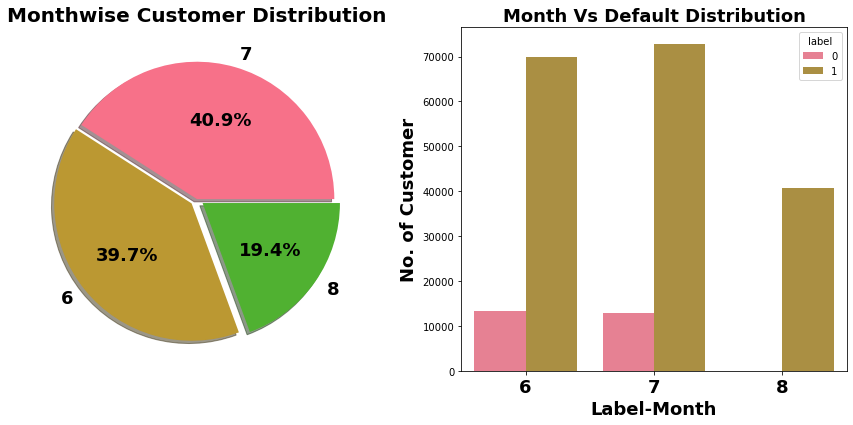

In [31]:
#Counting the number of defaulter and non-defaulter
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(12,6))

df['Month'].value_counts().plot.pie(explode=[0,0.05,0.05],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Monthwise Customer Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot('Month',hue='label',data=df,ax=ax[1])
ax[1].set_title('Month Vs Default Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Label-Month",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Customer",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Comment :

- **Most of data belong to month 6 and 7, followed my month 8.**
- **We can see very few defaulter in month 8.**

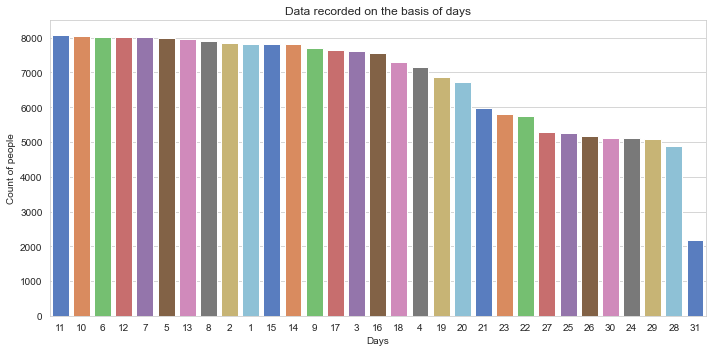

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(x='Day',data=df,palette='muted',order= df['Day'].value_counts().index)
plt.title('Data recorded on the basis of days')
plt.xlabel('Days')
plt.ylabel('Count of people')
plt.show()

**No significant insight from above plot.**

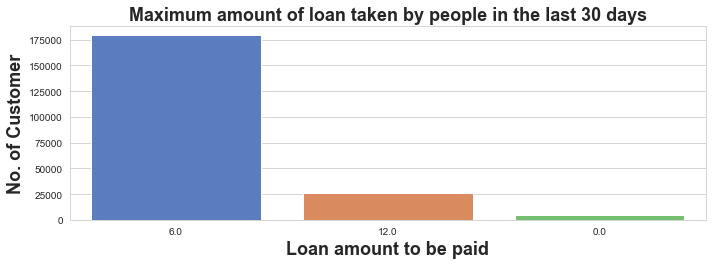

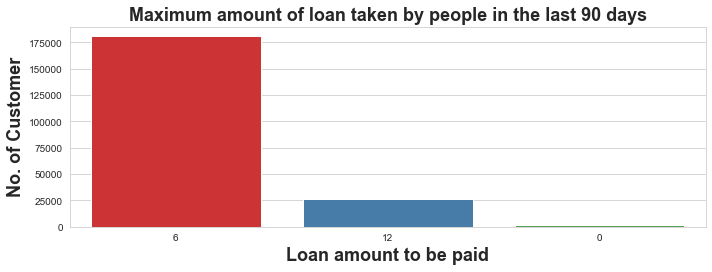

6.0     179192
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64


6     180944
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64


In [33]:
#Maximum amount of loan taken by people in last 30 and 90 days
plt.figure(figsize = (10,10))
plt.subplot(311)
sns.countplot(x='maxamnt_loans30',data=df,palette='muted',order=df['maxamnt_loans30'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Loan amount to be paid',fontsize=18,fontweight ='bold')
plt.ylabel('No. of Customer',fontsize=18,fontweight ='bold')
plt.show()

plt.figure(figsize = (10,10))
plt.subplot(312)
sns.countplot(x='maxamnt_loans90',data=df,palette='Set1',order=df['maxamnt_loans90'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 90 days',fontsize=18,fontweight ='bold')
plt.xlabel('Loan amount to be paid',fontsize=18,fontweight ='bold')
plt.ylabel('No. of Customer',fontsize=18,fontweight ='bold')
plt.show()
print(df['maxamnt_loans30'].value_counts())
print('\n')
print(df['maxamnt_loans90'].value_counts())

#### Observations:

1. In 30 days, maximum number of people had taken 6Rs as the loan amount and the number of people is 179192 whereas the  number of people had not taken loan and their number is 4291.

2. In 90 days, maximum number of people had taken 6Rs as the loan amount and the number of people is 180944 whereas the number of people had not taken loan and their number is 2043.

3. Maximum number of people had taken 12Rs as the loan amount within 90 days and their number is 26605 whereas for 30 days the number of people who had taken 12Rs is 26109 respectively.
**This means customer mostly opt for 6 Rs Loan.**

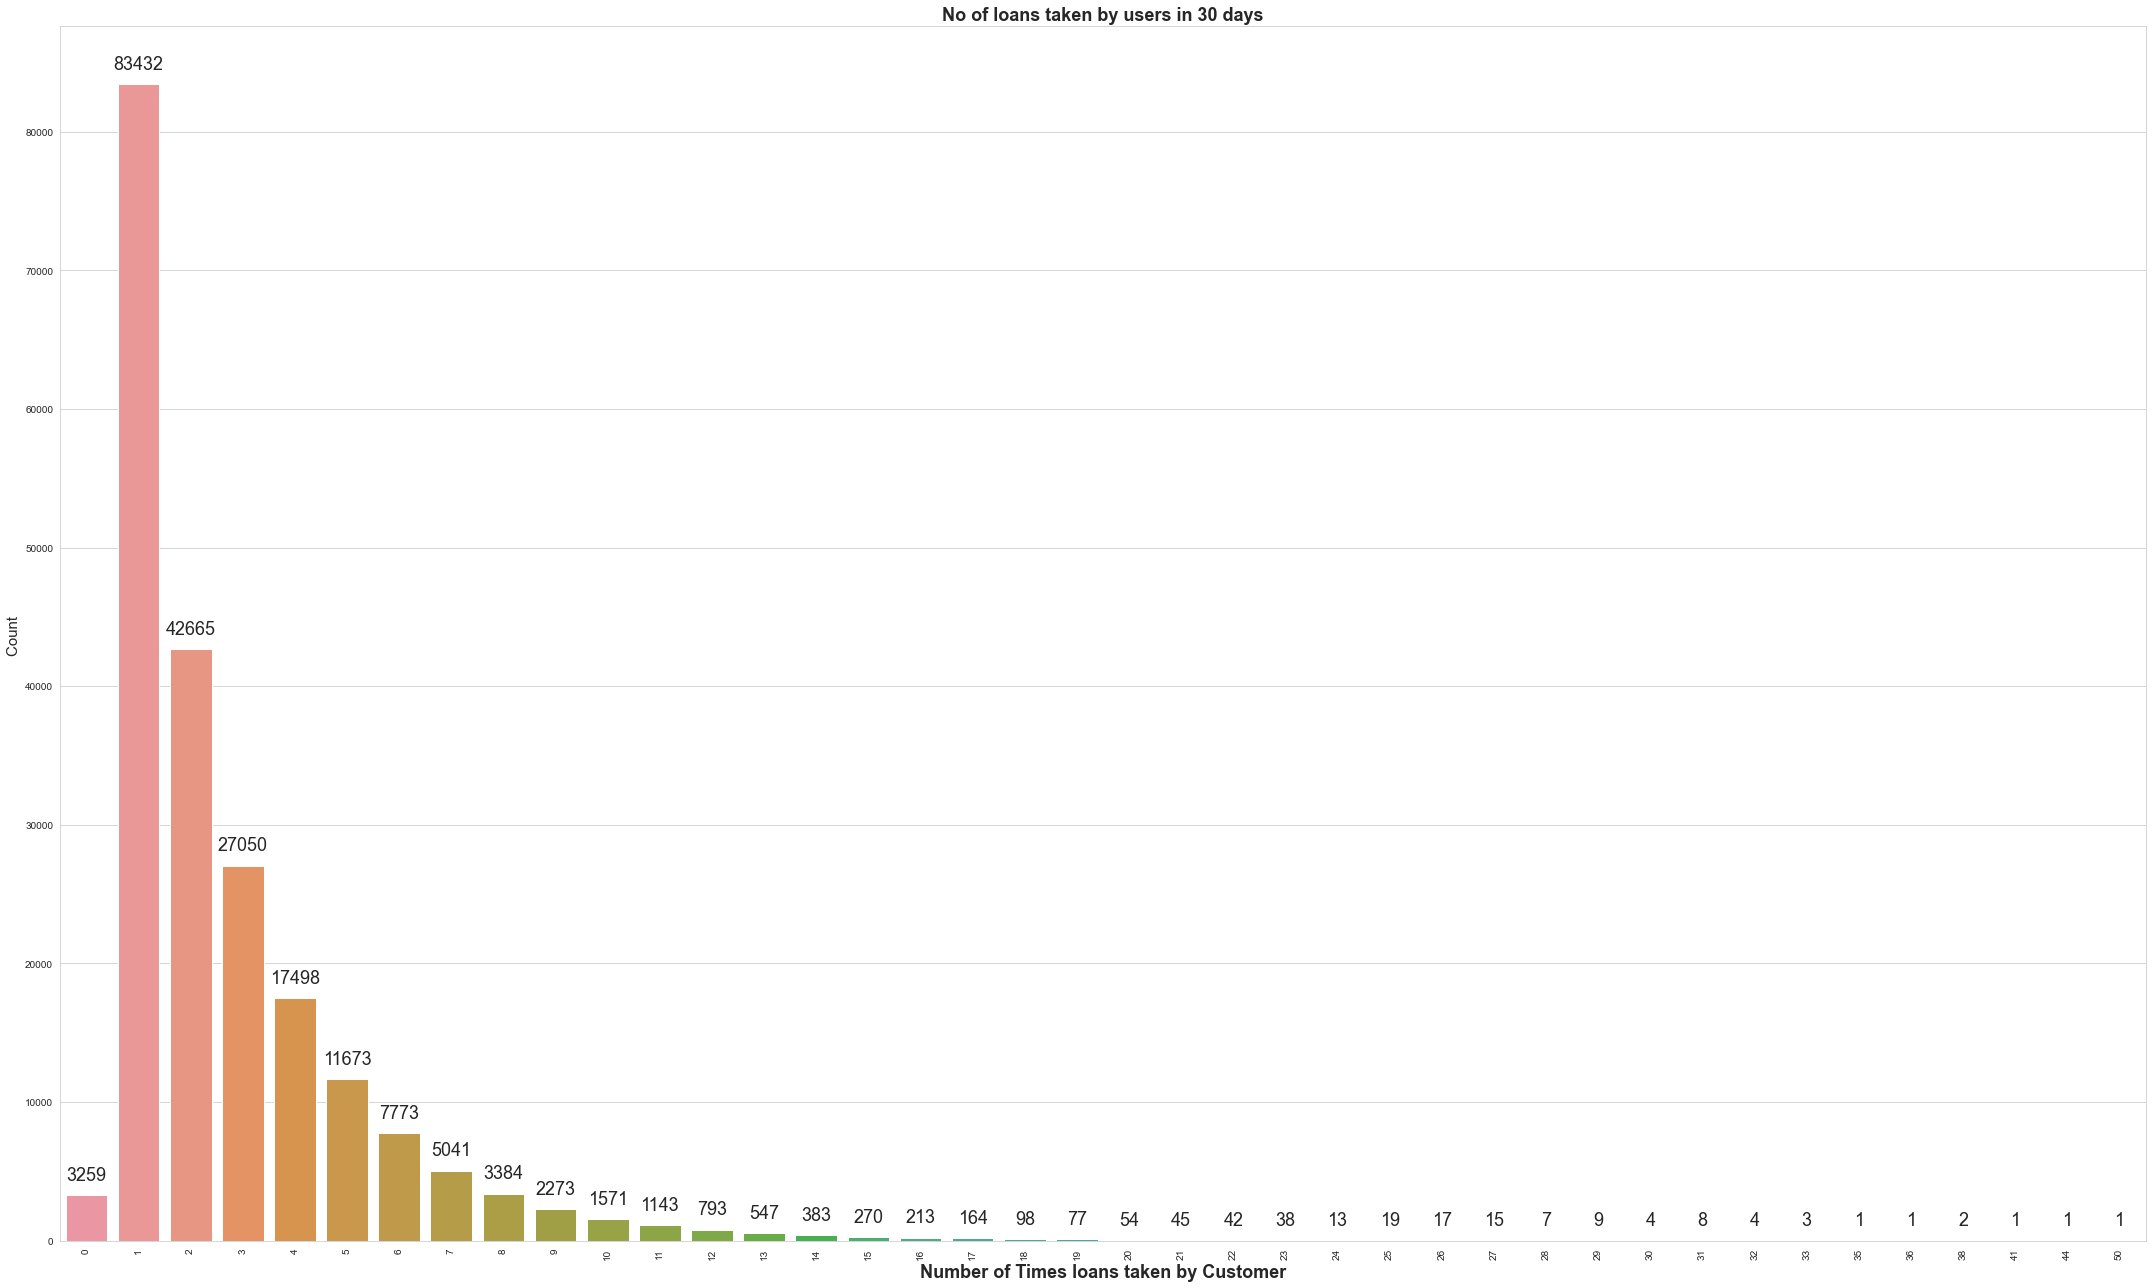

In [34]:
plt.figure(figsize=(30,18))
pd =sns.countplot(x = "cnt_loans30" ,  data=df)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=18, xytext = (0, 20), textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Number of Times loans taken by Customer",fontsize=18,fontweight ='bold')
plt.ylabel("Count " ,size=15)
plt.title ("No of loans taken by users in 30 days" ,fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()

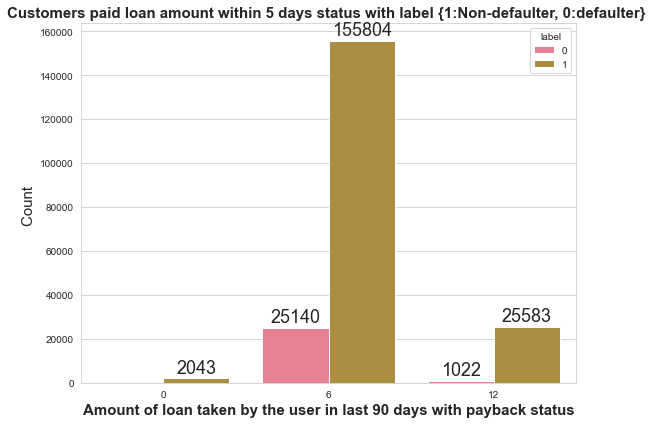

In [35]:
plt.figure(figsize=(8,6))
pd =sns.countplot(x = "maxamnt_loans90" ,  data=df  , hue= 'label')
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=18, xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Amount of loan taken by the user in last 90 days with payback status",fontsize=15,fontweight ='bold')
plt.ylabel("Count " ,size=15)
plt.title ("Customers paid loan amount within 5 days status with label {1:Non-defaulter, 0:defaulter} "
           ,fontsize=15,fontweight ='bold')
plt.tight_layout()
plt.show()

**Very few defaulter in customers who take loan in amount of 12.**

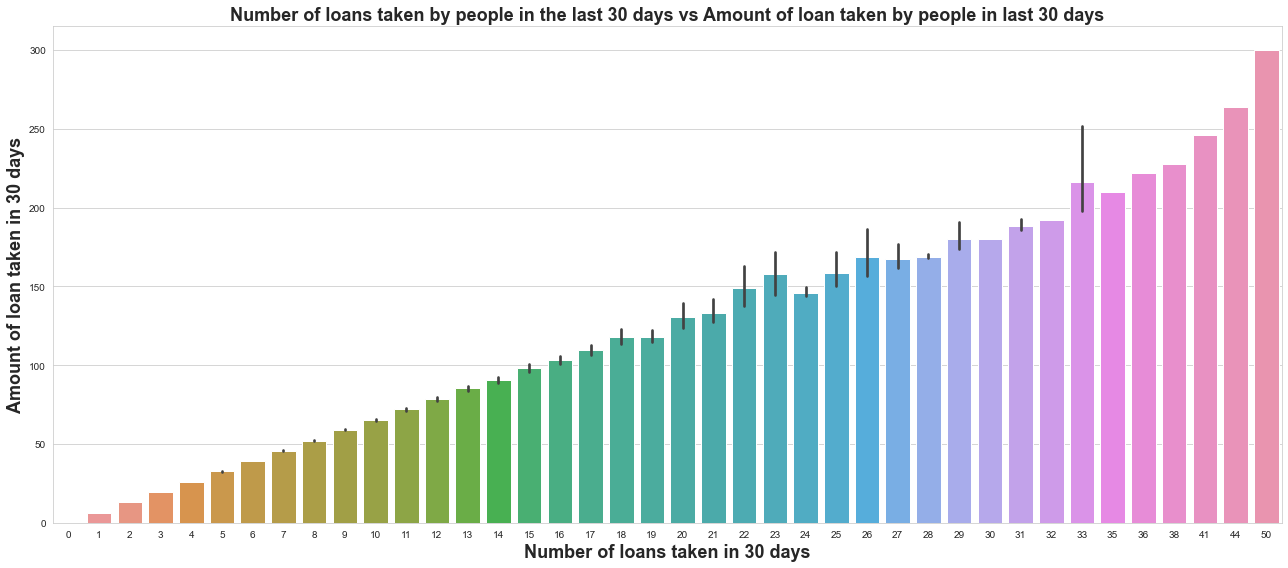

In [36]:
#Checking the number of loans taken by people in last 30 days vs Amount of loan taken by the people in last 90 days.
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='amnt_loans30', data=df)
plt.title('Number of loans taken by people in the last 30 days vs Amount of loan taken by people in last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Number of loans taken in 30 days',fontsize=18,fontweight ='bold')
plt.ylabel('Amount of loan taken in 30 days',fontsize=18,fontweight ='bold')
plt.show()

- **Maximum number of loans taken by the people is 50 and the Average loan amount is equivalent to 300.**

- **Minimum number of loans taken by the people is 0.**

**We can observe that the Average payback time over last 30 days is higher for people who had taken 2 times the loan and say that the users with less number of loan taking are more than the defaulters**

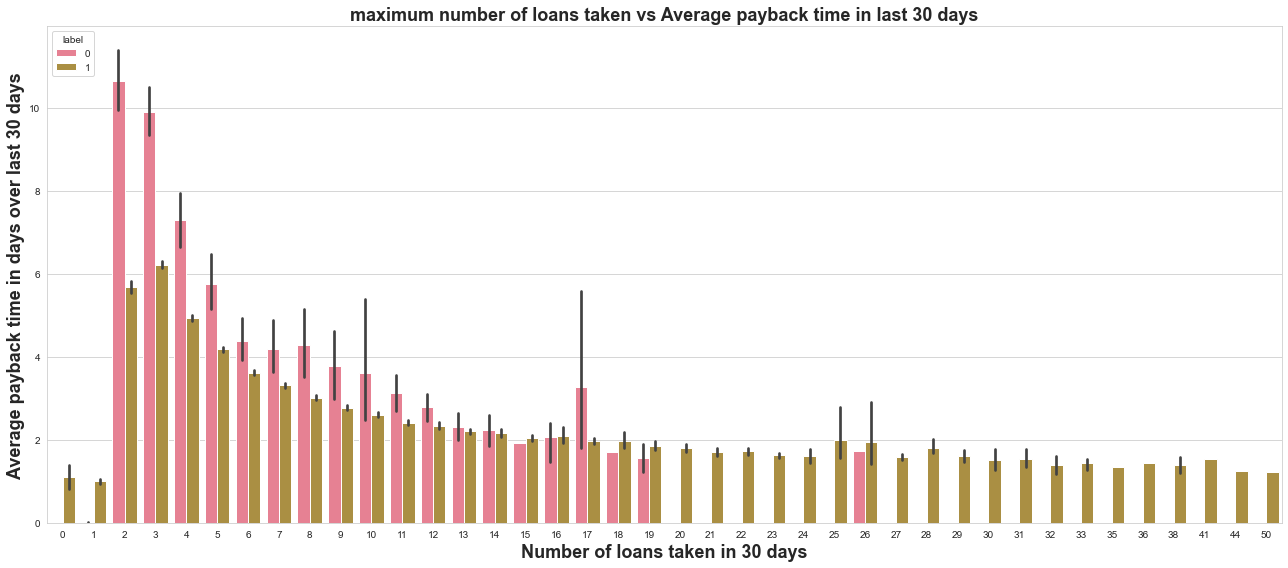

In [37]:
#Checking the maximum number of loans taken vs Amount payed within due dates by people or not on the basis of label
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='payback30',hue='label', data=df)
plt.title('maximum number of loans taken vs Average payback time in last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Number of loans taken in 30 days',fontsize=18,fontweight ='bold')
plt.ylabel('Average payback time in days over last 30 days',fontsize=18,fontweight ='bold')
plt.show()

**We can observe that the Average payback time over last 30 days is higher for people who had taken 2 times the loan and say that the users with less number of loan taking are more than the defaulters**

<Figure size 1080x576 with 0 Axes>

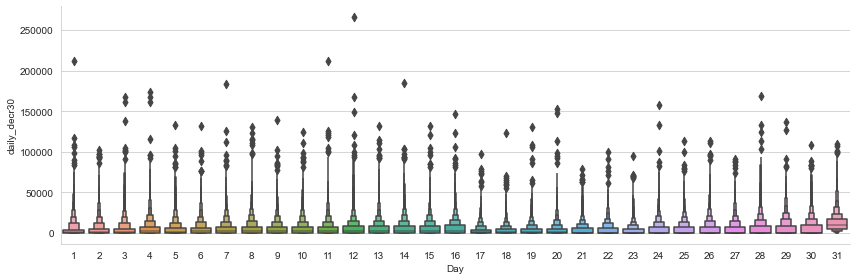

In [38]:
plt.figure(figsize=(15,8))
sns.catplot(y = "daily_decr30", x = "Day", data = df.sort_values("daily_decr30", ascending = False),
            kind="boxen", height = 4, aspect = 3)
plt.show()

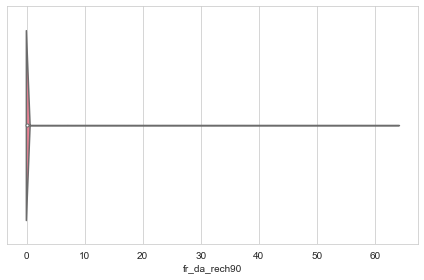

In [39]:
sns.violinplot(x='fr_da_rech90',data=df)
plt.show()

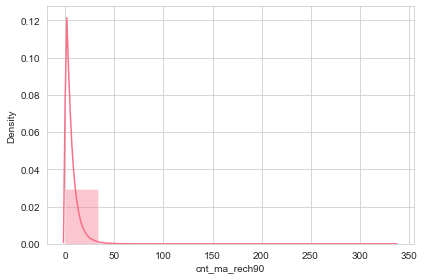

In [40]:
sns.distplot(df['cnt_ma_rech90'],bins=10)
plt.show()

<AxesSubplot:xlabel='maxamnt_loans90'>

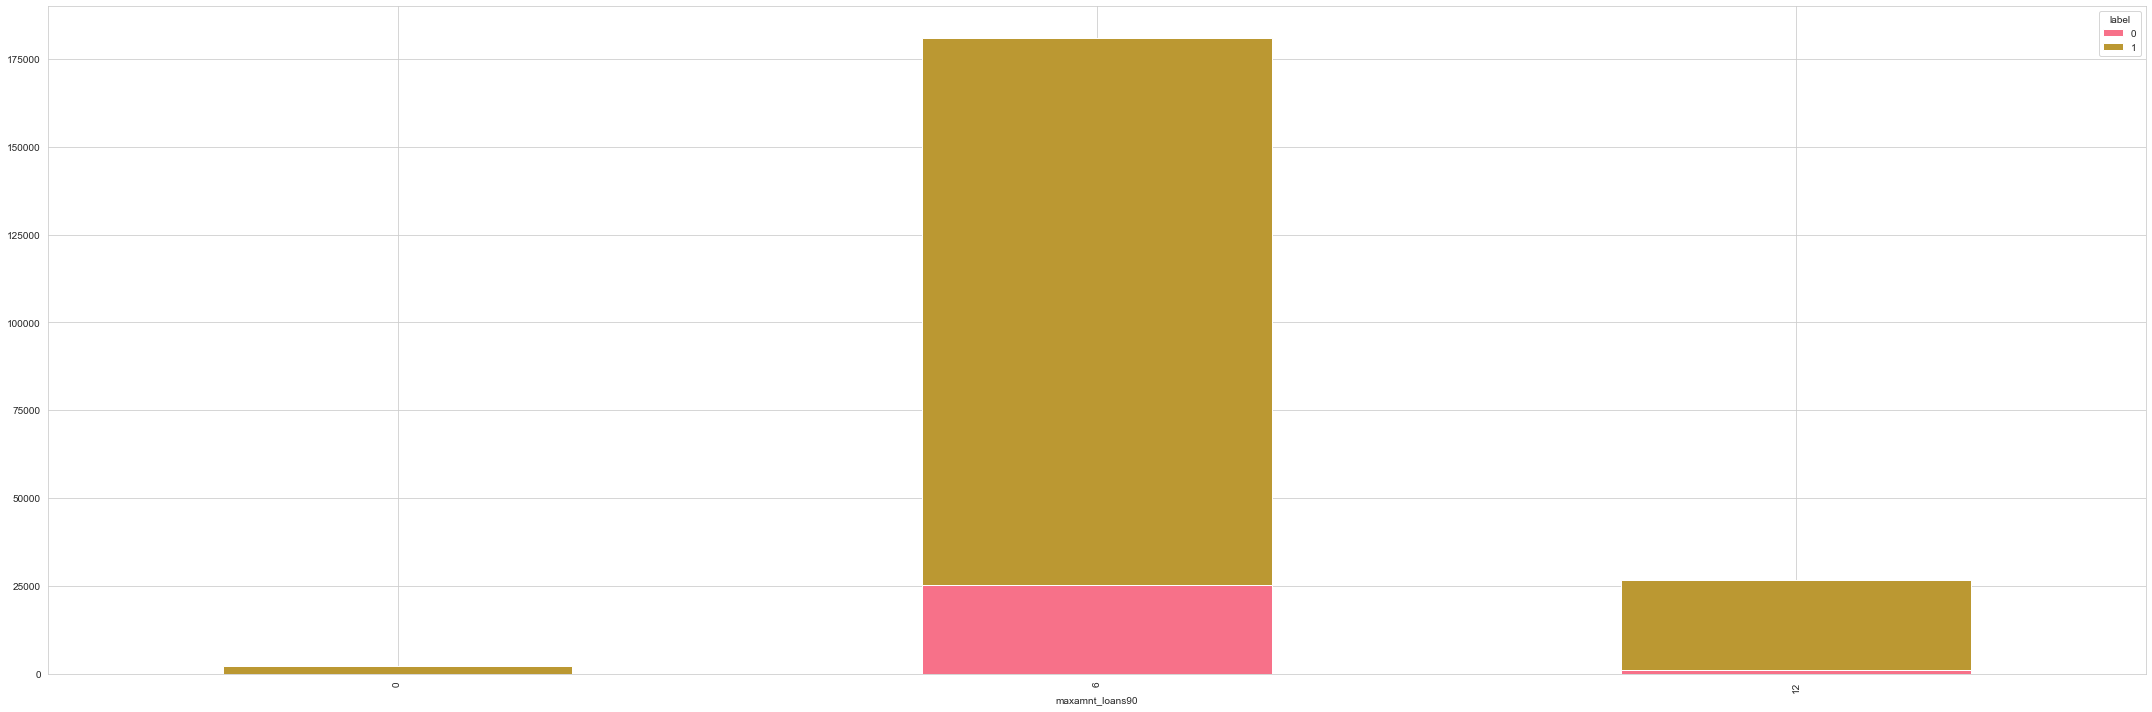

In [41]:
df.groupby(['maxamnt_loans90','label']).size().unstack().plot(kind='bar',stacked=True, figsize=(30,10))

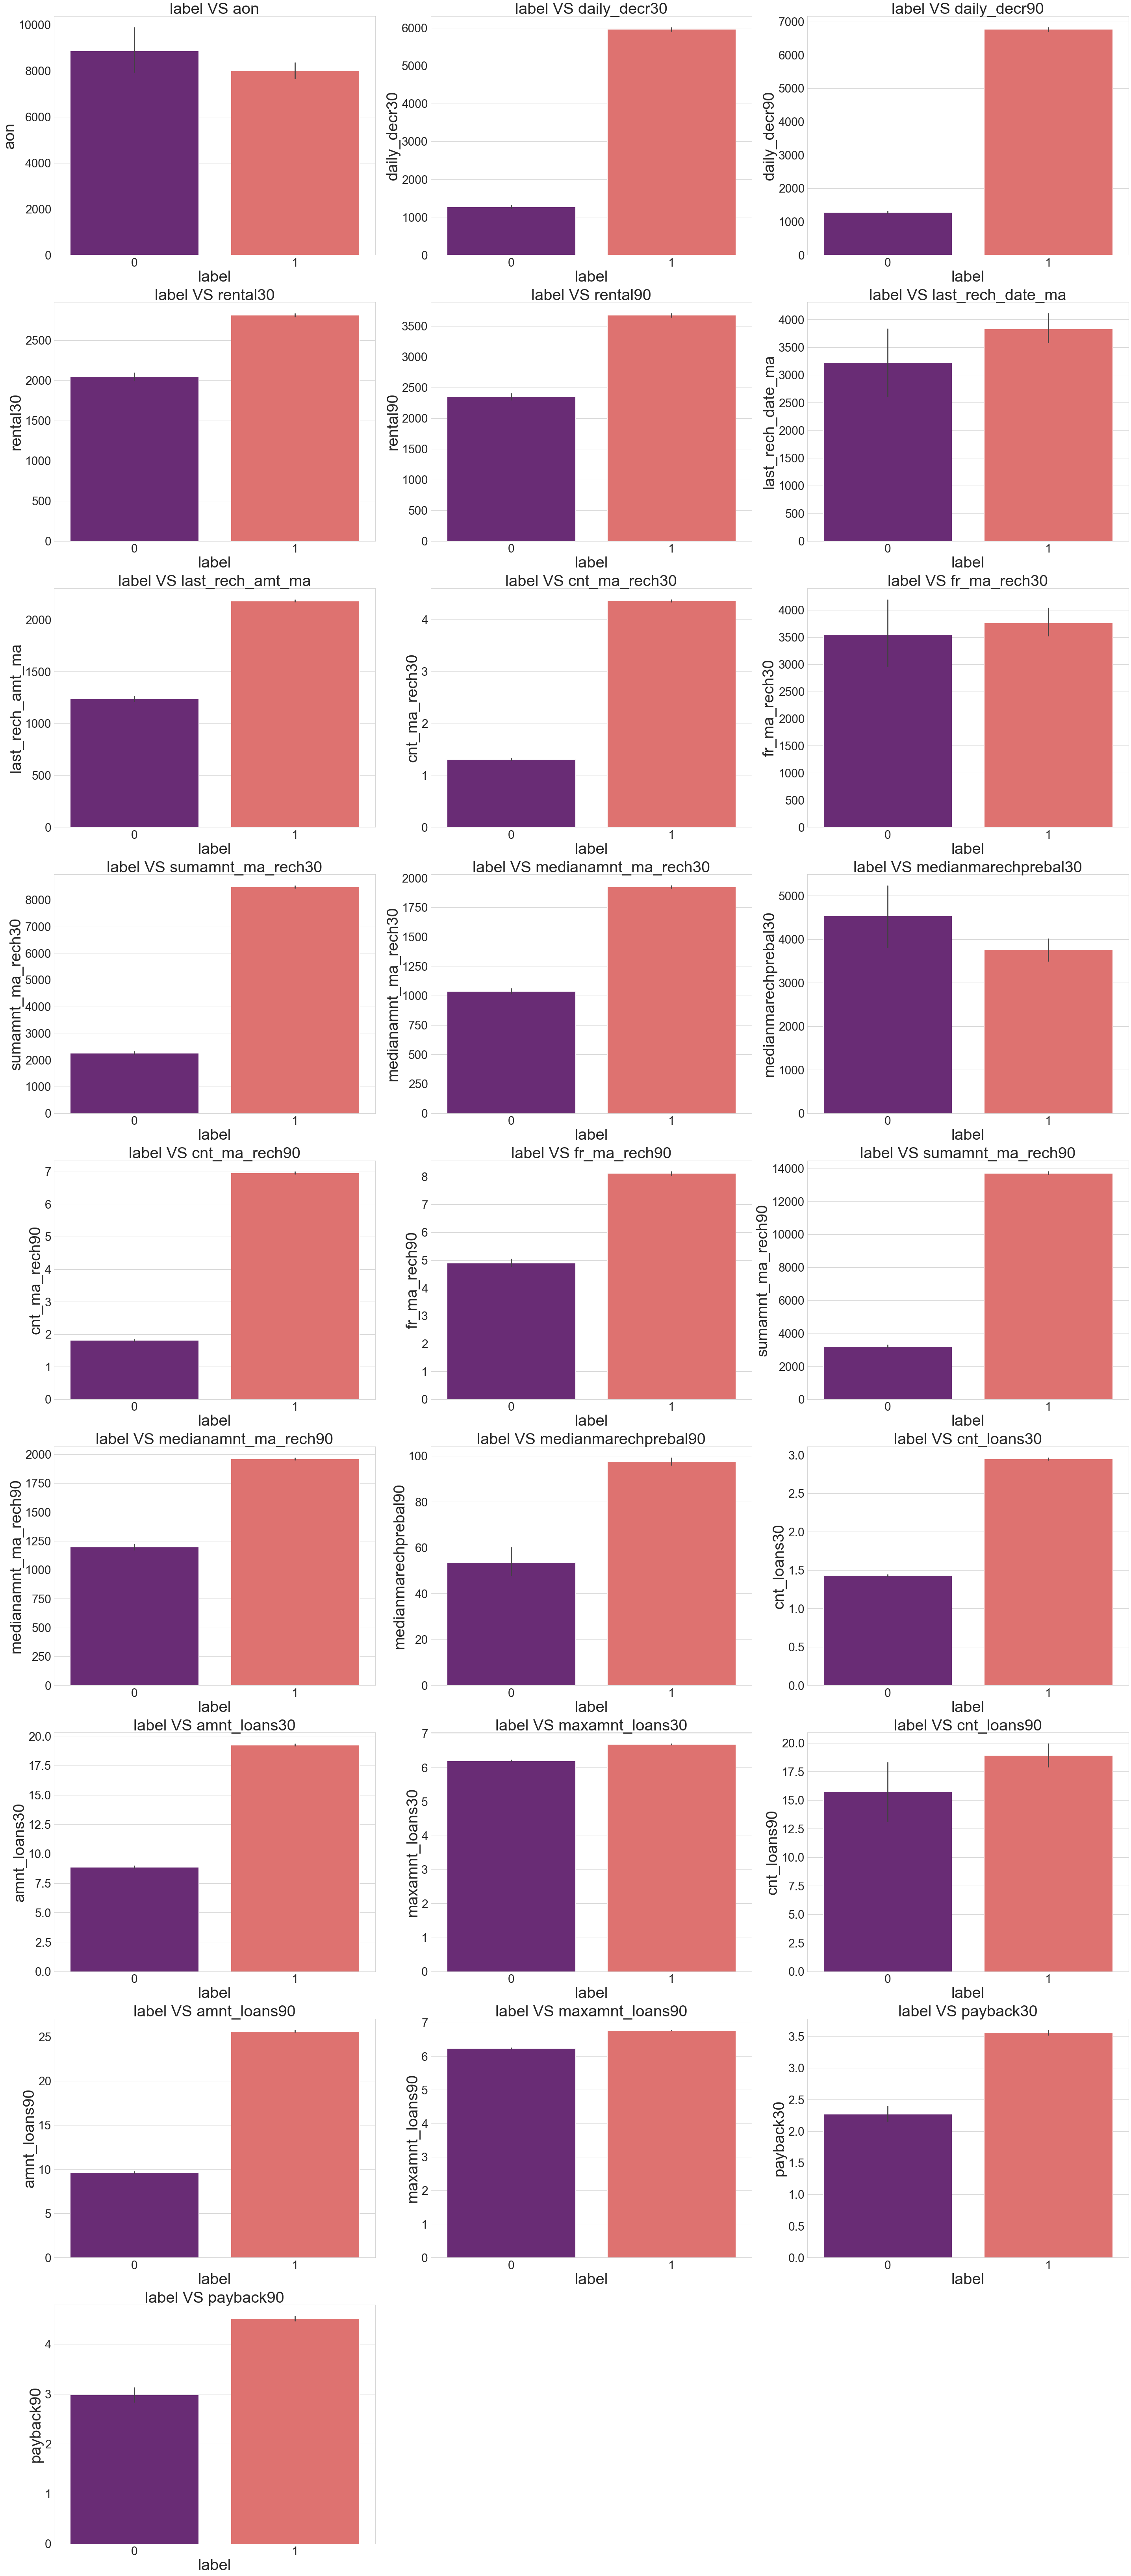

In [42]:
# Relation between target and other column :

col=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 
     'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
     'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 
     'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30',
     'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']

plt.figure(figsize=(40,100))
for i in range(len(col)):
    plt.subplot(10,3,i+1)
    sns.barplot(x=df['label'],y=df[col[i]],palette='magma')
    plt.title(f"label VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(col[i],fontsize = 40)
    plt.tight_layout()

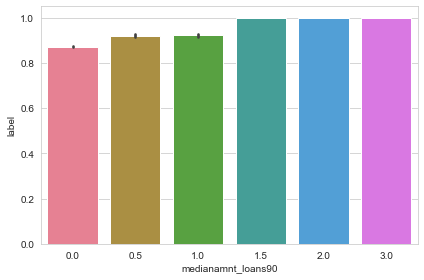

In [43]:
sns.barplot(x='medianamnt_loans90',y='label',data=df)
plt.show()

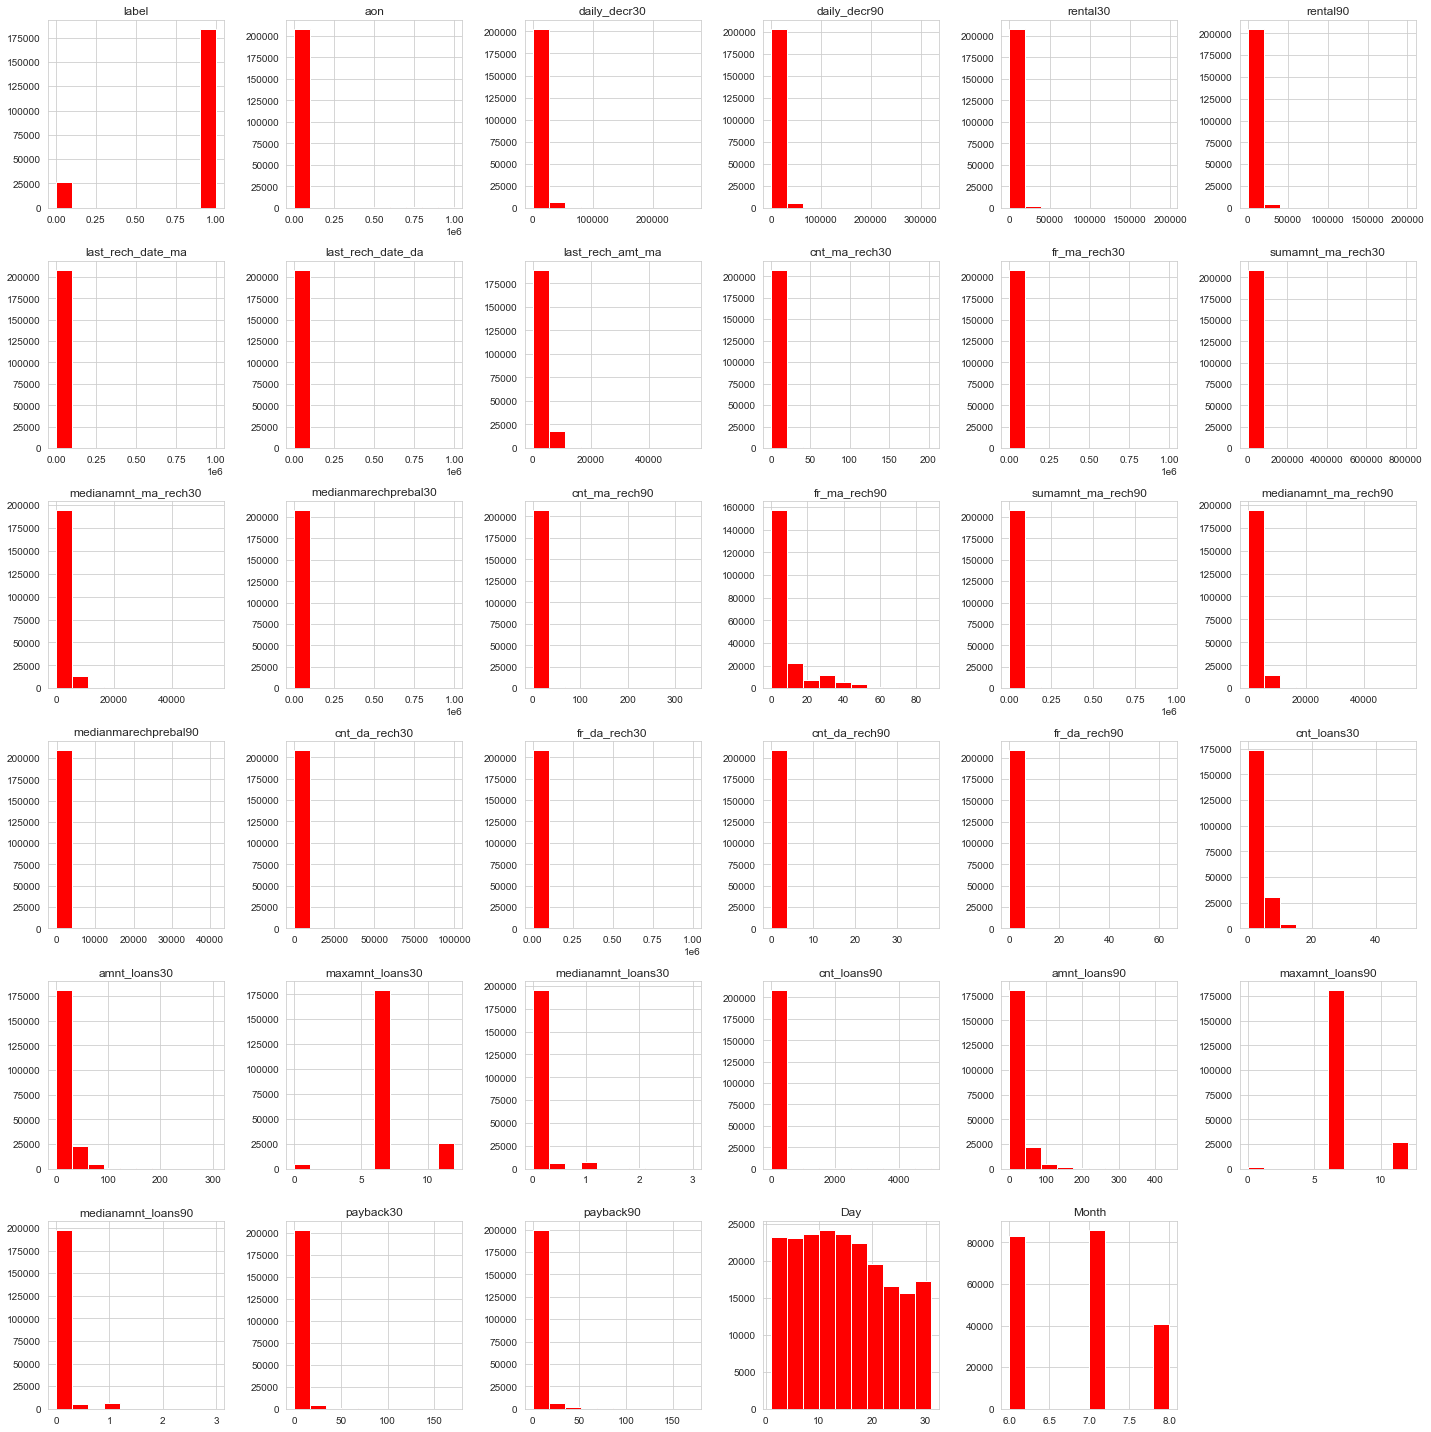

In [44]:
#Plotting the Histogram
df.hist(figsize=(20,20),color='r')
plt.show()

># Feature Enginnering

In [45]:
# As we have 37 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'Day', 'Month'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']}

In [46]:
df.shape

(209592, 35)

- **last_rech_date_da** contain more than 96% zero values , so this column will not have much value in prediction of label.

In [47]:
((df[df['last_rech_date_da'] == 0].value_counts().sum())/len(df['last_rech_date_da']))*100

96.78804534524218

In [48]:
df.drop(['last_rech_date_da'],axis=1,inplace=True)

- **Spliting Numerical features into Continous Numerical Features and Discreate Numerical Features.**

In [49]:
Continous_Numerical_Features = ['last_rech_amt_ma','sumamnt_ma_rech90', 'amnt_loans30', 'amnt_loans90', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma','sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'payback30', 'payback90']

In [50]:
Discreate_Numerical_Features = ['label','cnt_ma_rech30', 'cnt_ma_rech90','maxamnt_loans90', 'maxamnt_loans30' 'fr_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'Day', 'Month', 'fr_ma_rech30','cnt_da_rech30', 'fr_da_rech30','cnt_loans90','medianamnt_loans30','medianamnt_loans90']

**As no variable with object datatype is present in database no need for any kind of encoding.**

### 1. Outliers Detection and Removal

Outliers can exist in continous numerical features which can severely affect accuracy of prediction. In this 

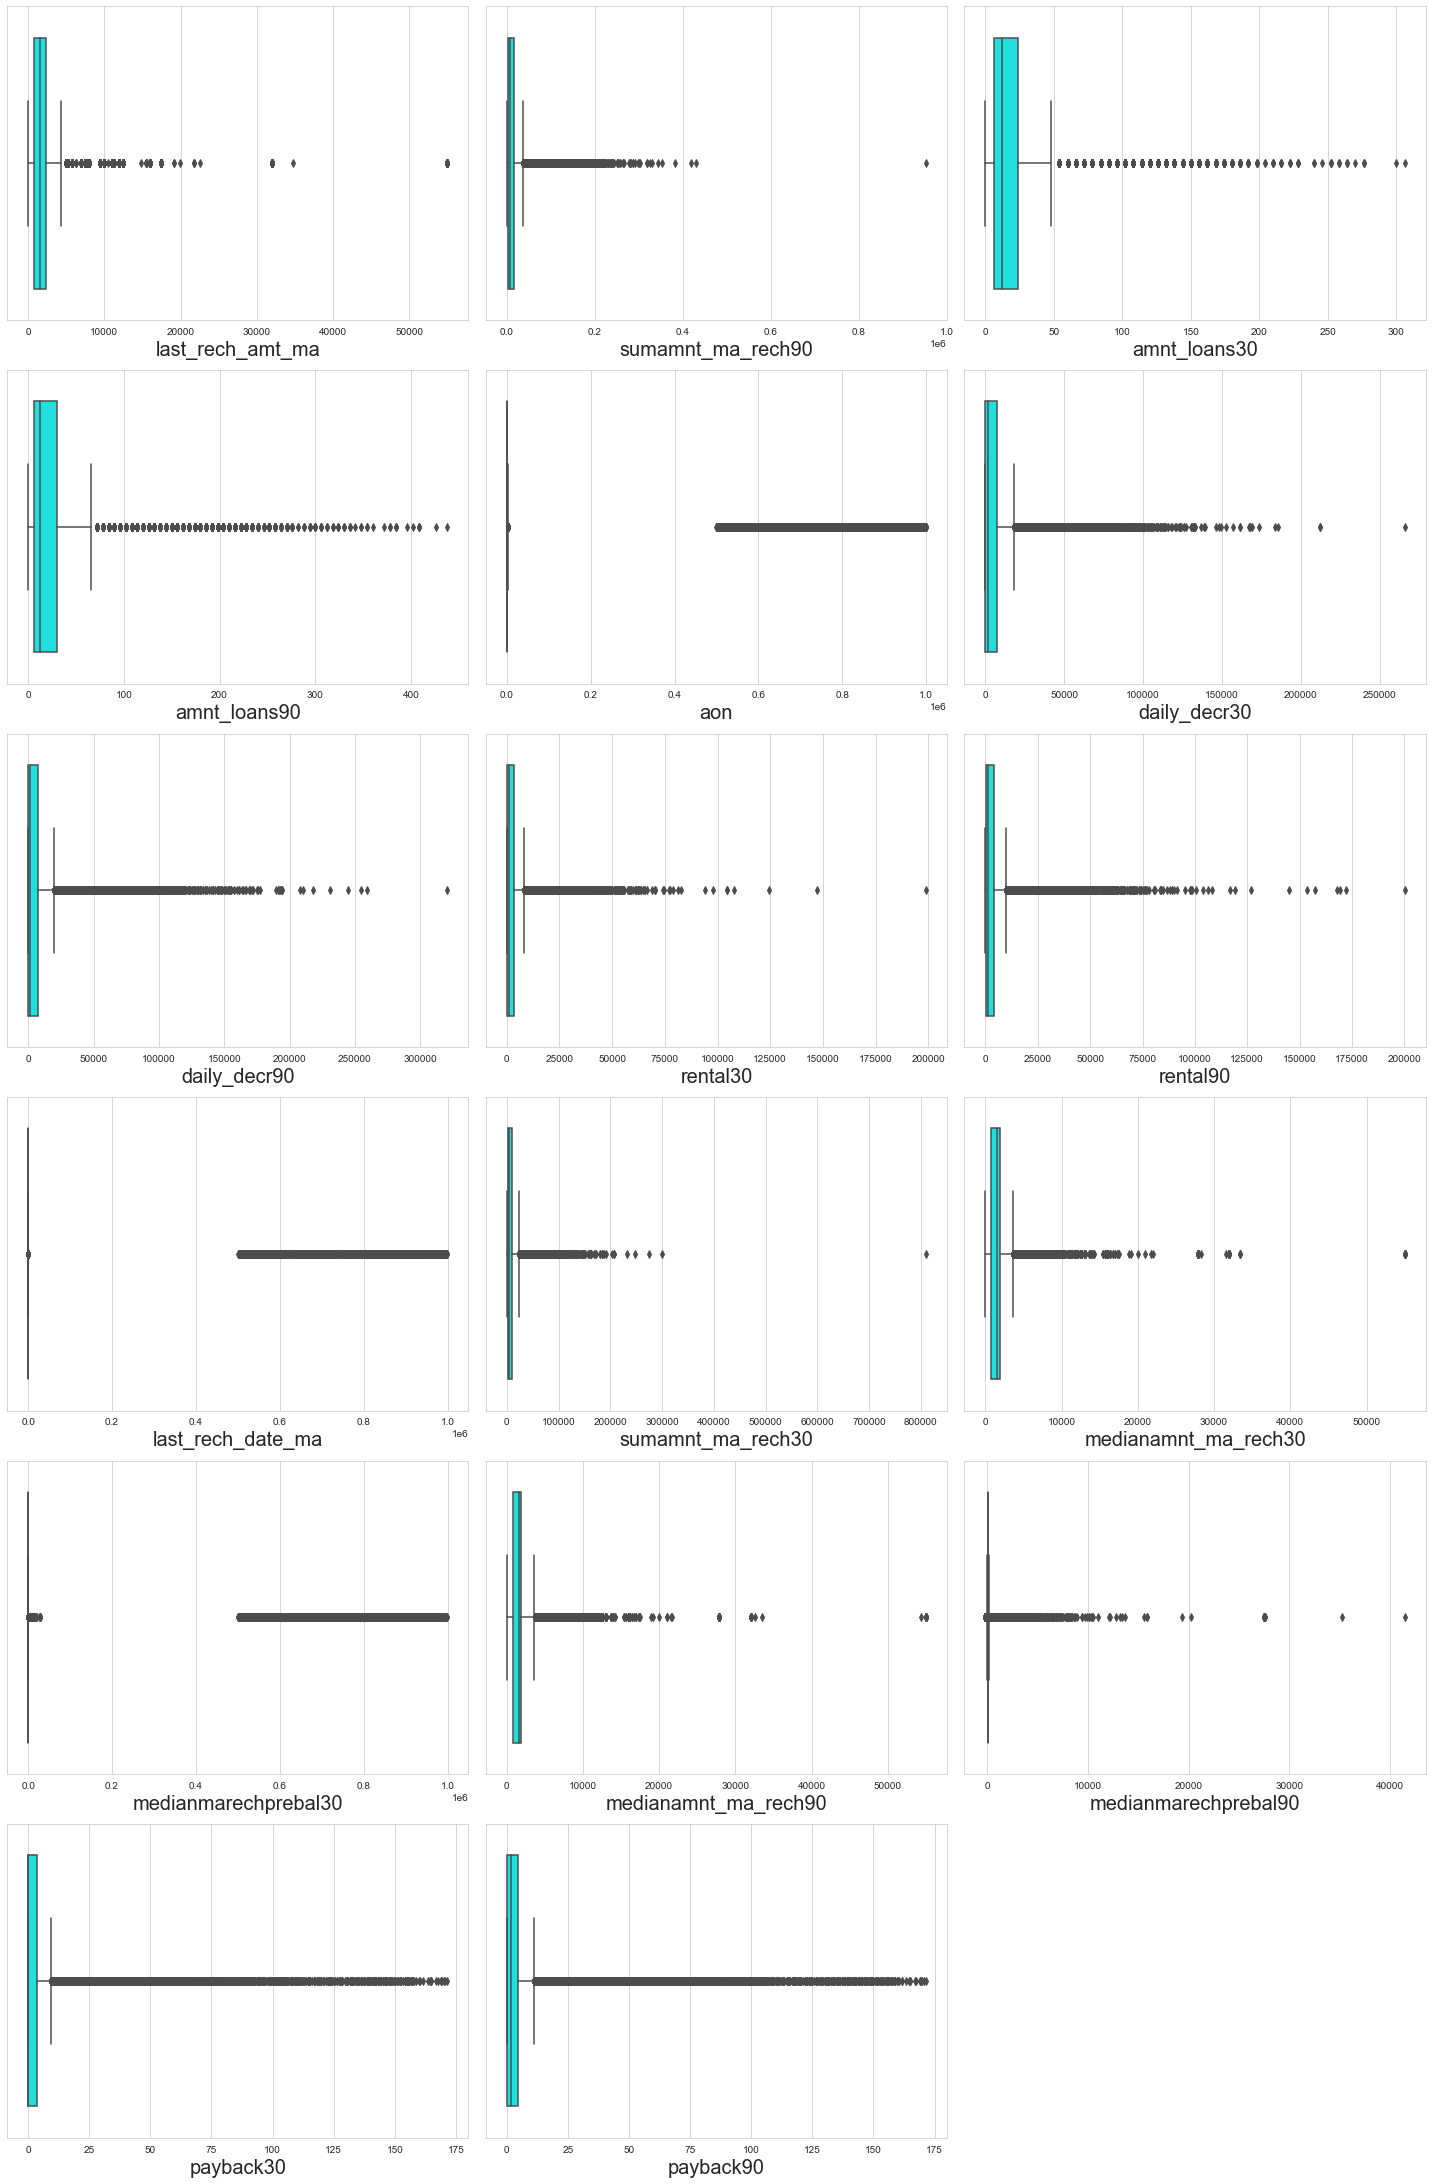

In [51]:
plt.figure(figsize=(20,40),facecolor='white')
plotnumber=1
for column in df[Continous_Numerical_Features]:
    if plotnumber<=22:
        ax=plt.subplot(8,3,plotnumber)
        sns.boxplot(df[column],color='cyan')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

**From above Boxplot we can easily see that outliers exist in dataset.**

In [52]:
df1=df.copy()

In [53]:
from scipy.stats import zscore
z = np.abs(zscore(df1[Continous_Numerical_Features]))
threshold = 3
df2 = df1[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", df2.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df2.shape[0])/df1.shape[0]*100)

df1=df2.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (209592, 34)
Shape of the dataframe after removing outliers:  (181757, 34)
Percentage of data loss post outlier removal:  13.280564143669608


**Huge amount of data loss in Z-score , which is not acceptable**

**Data loss naturally much higher in IQR compare to Z-score**

**AS outliers are present in upper bound,We need to employ some other outliers removal techinque here.**

### Comment :
- **There outliers exist in data.**
- **There are no outliers in lower capping level.**
- **So we will use Quantile-based Flooring and Capping technique.**

>**We will Employ Quantile-based Flooring and Capping technique for outliers removal. In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values.**

In [54]:
df.shape

(209592, 34)

In [55]:
df1=df.copy()
Q1 = df1[Continous_Numerical_Features].quantile(0)
Q3= df1[Continous_Numerical_Features].quantile(0.99)
IQR = Q3 - Q1
print(IQR)

last_rech_amt_ma        10000.000000
sumamnt_ma_rech90       78717.270000
amnt_loans30               84.000000
amnt_loans90              132.000000
aon                      2419.090000
daily_decr30            41730.620000
daily_decr90            49967.457800
rental30                19466.008500
rental90                26997.976500
last_rech_date_ma          57.000000
sumamnt_ma_rech30       46857.620000
medianamnt_ma_rech30    10000.000000
medianmarechprebal30     1531.545000
medianamnt_ma_rech90    10000.000000
medianmarechprebal90     1040.199700
payback30                  38.666667
payback90                  49.772500
dtype: float64


In [56]:
data = df1[~((df1[Continous_Numerical_Features] < (Q1 - 1.5 * IQR)) |(df1[Continous_Numerical_Features] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(204201, 34)


In [57]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((209592-data.shape[0])/209592)*100,'%')

Percentage Data Loss : 2.572140158021299 %


**We have 2.57% of data Loss with Quantile-based Flooring and Capping Method which is within acceptable range.**

Since outliers are removed we can move further

### 2. Skewness of features

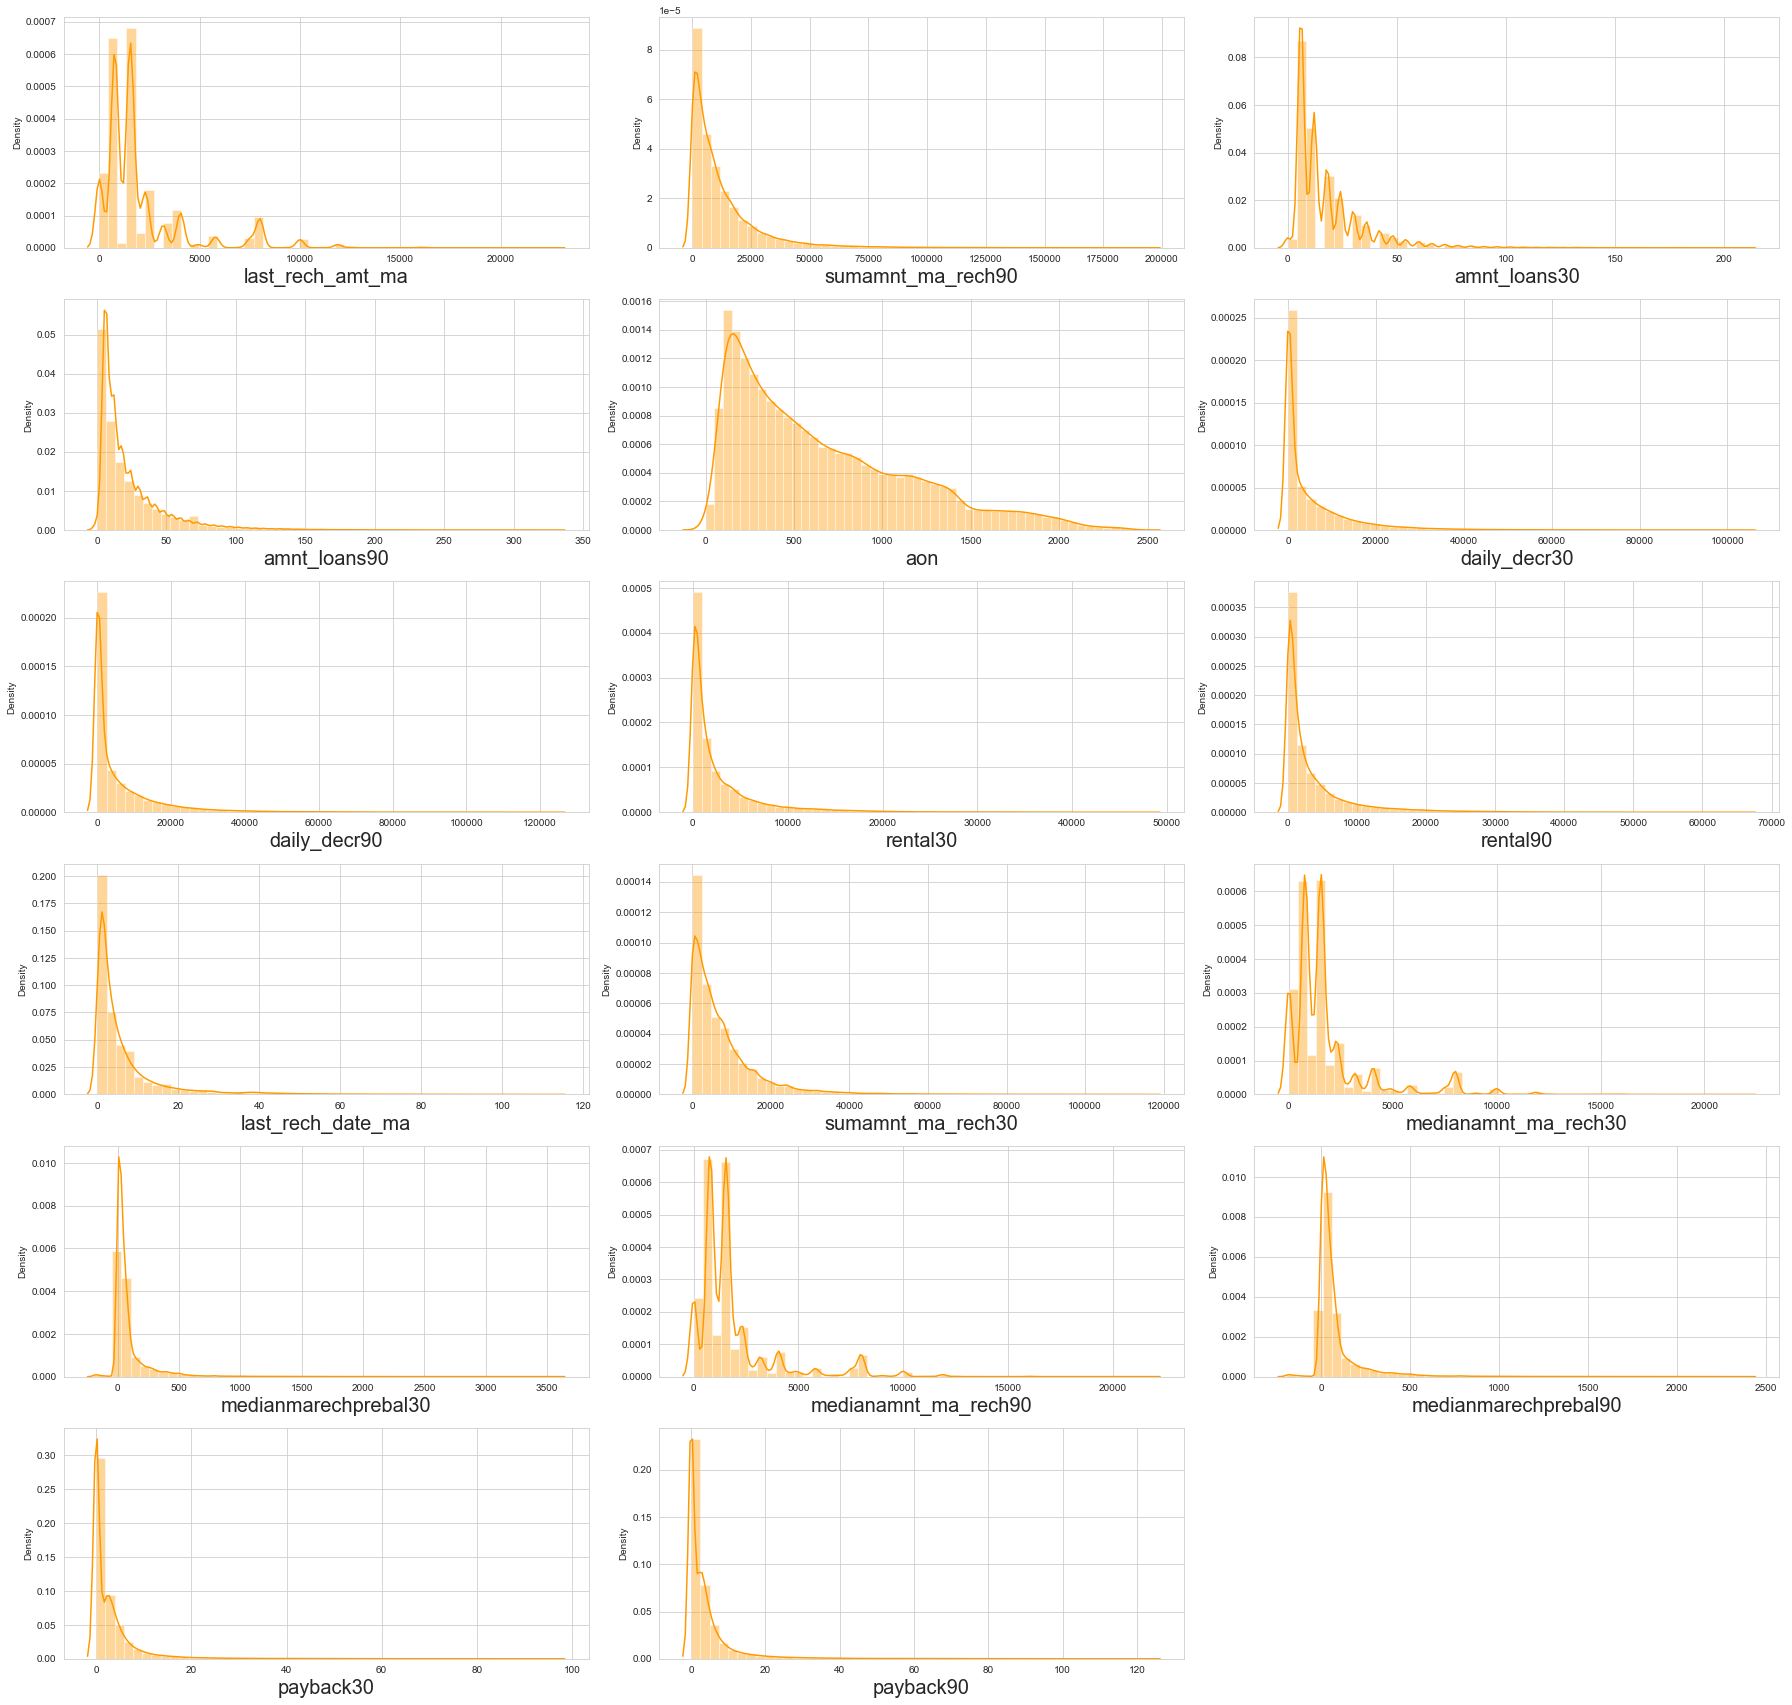

In [58]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
sns.set_palette('gist_rainbow')
for column in data[Continous_Numerical_Features]:
    if plotnumber<=22:
        ax=plt.subplot(9,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [59]:
data[Continous_Numerical_Features].skew()

last_rech_amt_ma        2.298286
sumamnt_ma_rech90       3.191740
amnt_loans30            2.685770
amnt_loans90            2.905533
aon                     0.952539
daily_decr30            3.113644
daily_decr90            3.278063
rental30                3.081190
rental90                3.238195
last_rech_date_ma       3.480690
sumamnt_ma_rech30       3.154083
medianamnt_ma_rech30    2.514285
medianmarechprebal30    6.381401
medianamnt_ma_rech90    2.527614
medianmarechprebal90    5.611922
payback30               5.940572
payback90               5.275174
dtype: float64

**All features are skewed except few one.**

**We will use PowerTransformer to transform skewness in features.**

**We will not perform on label as it is our Target Variable.**

In [60]:
skew_fea=['aon','daily_decr30', 'daily_decr90', 'rental30','rental90','last_rech_date_ma', 'last_rech_date_da',
          'last_rech_amt_ma','cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30','medianamnt_ma_rech30', 
          'medianmarechprebal30', 'cnt_ma_rech90','fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
          'medianmarechprebal90', 'cnt_da_rech30','cnt_da_rech90', 'cnt_loans30', 'amnt_loans30',
          'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
          'maxamnt_loans90','medianamnt_loans90', 'payback30', 'payback90']

In [61]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [62]:
data[Continous_Numerical_Features] = scaler.fit_transform(data[Continous_Numerical_Features].values)

In [63]:
data[Continous_Numerical_Features].skew()

last_rech_amt_ma       -0.083453
sumamnt_ma_rech90      -0.212345
amnt_loans30            0.002417
amnt_loans90           -0.008085
aon                    -0.056899
daily_decr30           -0.132349
daily_decr90           -0.122295
rental30               -0.045380
rental90               -0.045546
last_rech_date_ma       0.041830
sumamnt_ma_rech30      -0.311961
medianamnt_ma_rech30   -0.204692
medianmarechprebal30    1.286894
medianamnt_ma_rech90   -0.065142
medianmarechprebal90    1.464041
payback30               0.294417
payback90               0.206949
dtype: float64

**Skewness of most of features is reduced.**

### 3. Correlation & VIF

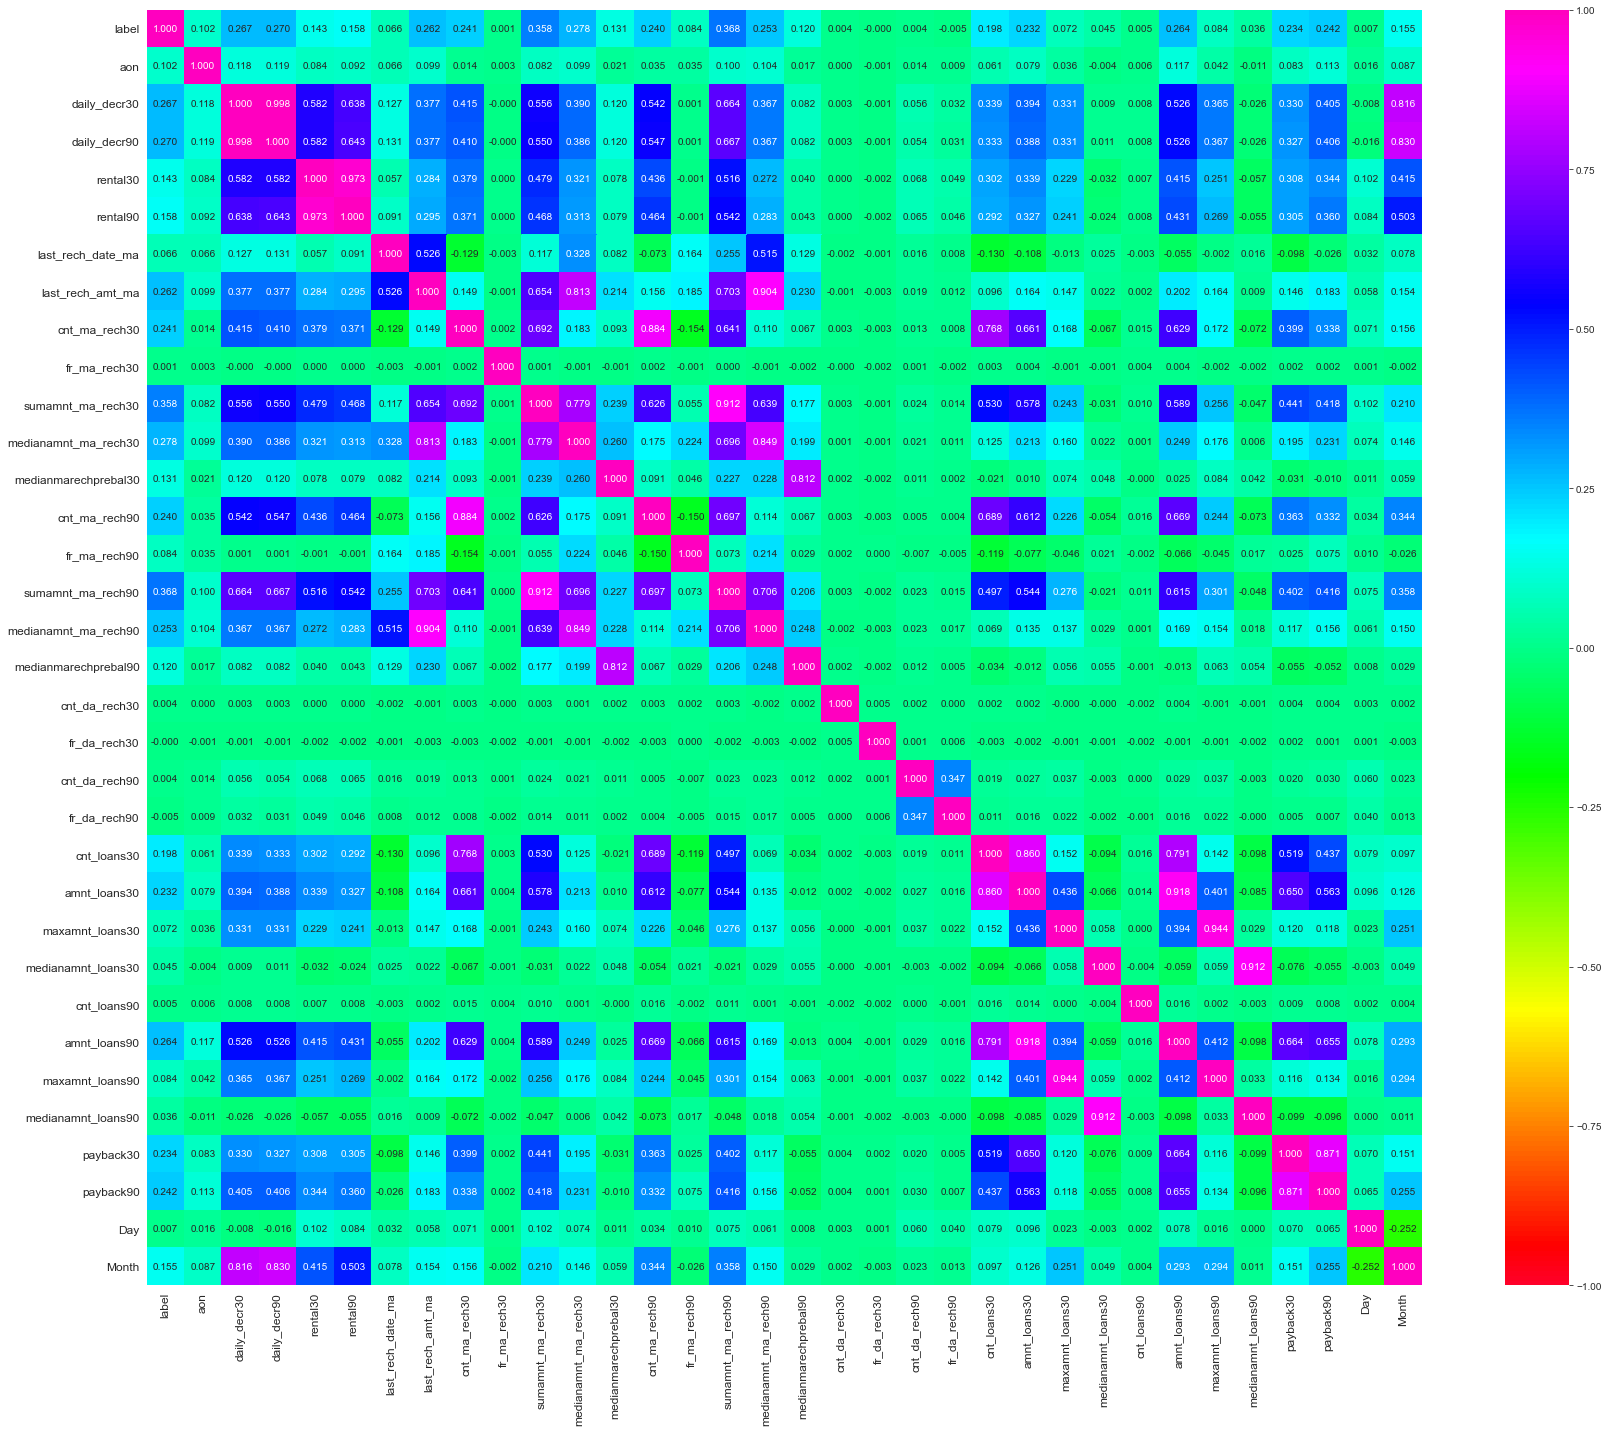

In [64]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_rainbow")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Observation :
- **daily_decr30 and daily_decr90 are highly correlated with each other.**
- **rental30 and rental90 are highly correlated with each other.**
- **payback30 and payback90 are highly correlated with each other.**
- **cnt_loans30 and amnt_loans30 are highly correlated with each other.**

> ***Above features are highly correlated with each other. Multicollinerity exist between these features so
we can drop someone of features based on following two categories:***

   **1. For mutlicolliner feature we will drop one feature in pair which has less correlation with label compare to other feature.**
   
   **2. Another Criteria for dropping feature which are very poorly correlated with label (less than 5% correlation with target).**

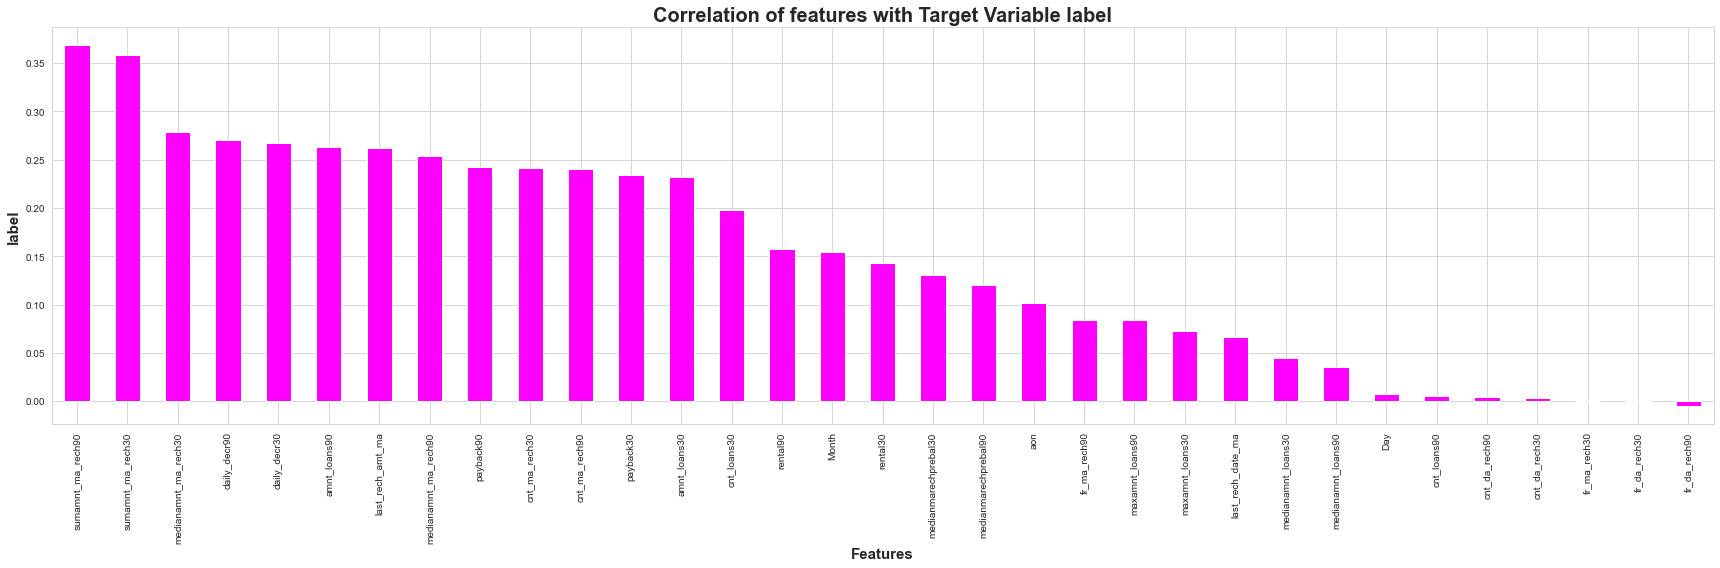

In [65]:
plt.figure(figsize = (24,8))
data.corr()['label'].drop(['label']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('label',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable label',fontsize = 20,fontweight='bold')
plt.show()

 - **1. Dropping feature which are poorly correlated with label**

In [66]:
# Dropping feature which are poorly correlated with label
data.drop(['Day','cnt_loans90','cnt_da_rech90','cnt_da_rech30','fr_ma_rech30','fr_da_rech30','fr_ma_rech90'], axis =1,inplace =True)

- **2. Droping feature having multicollinerity based on pearson correlation coefficient with threshold value of 0.8**

In [67]:
#Droping feature having multicollinerity based on pearson correlation coefficient with threshold value of 0.8
data.drop(['daily_decr30','rental30','cnt_loans30','payback30'], axis =1,inplace =True)

In [68]:
data.shape

(204201, 23)

In [69]:
data.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,fr_da_rech90,amnt_loans30,maxamnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,Month
0,0,-0.685634,0.472277,-0.794696,-0.327992,0.086954,2,-0.179502,0.212594,-0.442549,2,-0.442008,0.151516,-0.469500,0,-0.099694,6.0,0.0,-0.253061,6,0.0,1.800829,7
1,1,0.397639,1.063530,0.620080,1.543961,1.523812,1,0.222412,1.655822,-0.031100,1,-0.085833,1.710701,-0.027979,0,-0.099694,12.0,0.0,-0.253061,12,0.0,-1.019024,8
2,1,0.047589,0.167248,-0.215664,0.001561,0.086954,1,-0.539711,0.212594,0.003937,1,-0.763719,0.151516,0.010125,0,-0.897816,6.0,0.0,-1.008492,6,0.0,-1.019024,8
3,1,-0.803885,-1.120739,-0.989597,2.039735,-0.290830,0,-1.900879,-1.961543,-0.528021,1,-0.952919,-0.252592,-0.524913,0,-0.099694,6.0,0.0,-0.253061,6,0.0,-1.019024,6
4,1,0.773404,-0.584971,-0.109928,0.243224,0.457105,7,1.280629,0.583405,-0.259399,8,0.987135,0.797213,-0.225879,0,1.458274,6.0,0.0,1.098536,6,0.0,0.433000,6


### 4. Balanceing Imbalanced target feature

In [70]:
# Splitting data in target and dependent feature
X = data.drop(['label'], axis =1)
Y = data['label']

<b> As Target variable data is Imbalanced in nature we will need to balance target variable.</b>

In [71]:
data.label.value_counts()

1    178746
0     25455
Name: label, dtype: int64

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [74]:
Y.value_counts()

0    178746
1    178746
Name: label, dtype: int64

**We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.**

### 5. Standard Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [76]:
X_scale

array([[-0.55428439,  0.75685194, -0.57404691, ..., -0.20609524,
         2.08458318,  0.50482574],
       [ 0.50476285,  1.33064089,  0.75374819, ..., -0.20609524,
        -0.74548909,  2.00477724],
       [ 0.16254076,  0.46083162, -0.03061408, ..., -0.20609524,
        -0.74548909,  2.00477724],
       ...,
       [ 0.86059318, -0.97663267,  0.63388413, ...,  5.55578045,
        -0.74548909, -0.99512576],
       [-0.13383888,  0.15284916,  0.19634788, ..., -0.20609524,
        -0.74548909,  0.50482574],
       [-2.80455812,  0.46639465, -0.67403603, ..., -0.20609524,
        -0.74548909,  0.50482574]])

In [77]:
import pandas as pd
df = pd.DataFrame(X_scale, columns = X.columns)

In [78]:
df.shape

(357492, 22)

In [79]:
df.head()

,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,fr_da_rech90,amnt_loans30,maxamnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,Month
0,-0.554284,0.756852,-0.574047,-0.213303,0.345671,-0.220334,0.216467,0.474131,-0.300453,-0.386851,-0.016502,0.390813,-0.333554,-0.051993,0.186995,-0.236700,-0.218786,0.054539,-0.280381,-0.206095,2.084583,0.504826
1,0.504763,1.330641,0.753748,1.368902,1.621589,-0.494130,0.591721,1.756760,0.128488,-0.552366,0.317628,1.761098,0.118195,-0.051993,0.186995,3.006801,-0.218786,0.054539,3.115271,-0.206095,-0.745489,2.004777
2,0.162541,0.460832,-0.030614,0.065241,0.345671,-0.494130,-0.119848,0.474131,0.165015,-0.552366,-0.318300,0.390813,0.157182,-0.051993,-0.709824,-0.236700,-0.218786,-0.777199,-0.280381,-0.206095,-0.745489,2.004777
3,-0.669891,-0.789112,-0.756965,1.787938,0.010202,-0.767926,-1.390725,-1.458075,-0.389559,-0.552366,-0.495789,0.035665,-0.390251,-0.051993,0.186995,-0.236700,-0.218786,0.054539,-0.280381,-0.206095,-0.745489,-0.995126
4,0.872124,-0.269169,0.068621,0.269498,0.674363,1.148647,1.579742,0.803679,-0.109517,0.606237,1.324185,0.958281,-0.084290,-0.051993,1.937625,-0.236700,-0.218786,1.542660,-0.280381,-0.206095,0.711797,-0.995126


In [80]:
import gc

In [81]:
gc.collect() # to collect the throshold and cle cache

79129

### Information Gain for feature selection

In [82]:
from sklearn.feature_selection import mutual_info_classif

In [83]:
mutual_info=mutual_info_classif(X,Y)

In [84]:
Mutual_data=pd.Series(mutual_info,index=X.columns)
Mutual_data.sort_values(ascending=False)

aon                     0.437370
last_rech_date_ma       0.340769
sumamnt_ma_rech90       0.331860
sumamnt_ma_rech30       0.323146
medianmarechprebal90    0.318403
medianmarechprebal30    0.304934
medianamnt_ma_rech90    0.269764
medianamnt_ma_rech30    0.256275
payback90               0.252118
last_rech_amt_ma        0.239716
amnt_loans90            0.233725
daily_decr90            0.228111
amnt_loans30            0.202361
cnt_ma_rech90           0.171810
cnt_ma_rech30           0.152944
Month                   0.099912
rental90                0.082837
maxamnt_loans90         0.051638
maxamnt_loans30         0.049313
medianamnt_loans30      0.018565
medianamnt_loans90      0.014402
fr_da_rech90            0.000000
dtype: float64

># Machine Learning Model Building

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (250244, 22)
Training target vector size: (250244,)
Test feature matrix size: (107248, 22)
Test target vector size: (107248,)


## 1.  Logistic Regression

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, random_state=99, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7746438162017008


Confusion matrix of Logistics Regression : 
 [[42921 10747]
 [13422 40158]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78     53668
           1       0.79      0.75      0.77     53580

    accuracy                           0.77    107248
   macro avg       0.78      0.77      0.77    107248
weighted avg       0.78      0.77      0.77    107248



In [88]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, df, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.76918558 0.77461223 0.77627346 0.77519651 0.77416152]
Mean CV Score : 0.7738858603098958
Std deviation : 0.0024541658956182062


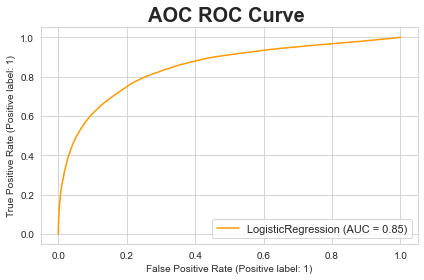

Auc Score :
 0.7746231986947081


In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(log_reg,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, log_reg.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## 2. Decision Tree Classifier

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, random_state=62, test_size=.33)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.888635535249591


Confusion matrix of Decision Tree Classifier : 
 [[52995  6044]
 [ 7094 51840]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     59039
           1       0.90      0.88      0.89     58934

    accuracy                           0.89    117973
   macro avg       0.89      0.89      0.89    117973
weighted avg       0.89      0.89      0.89    117973



In [91]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, df, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.83918656 0.90640429 0.90651487 0.9068925  0.90715824]
Mean CV Score : 0.8932312915302598
Std deviation : 0.027023702663198257


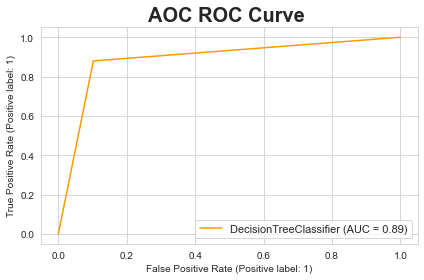

Auc Score :
 0.8886275254166157


In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dtc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, dtc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## 3. Random Forest Classifier 

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, random_state=62, test_size=.33)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier Evaluation


Accuracy Score of Random Forest Classifier : 0.9423851220194451


Confusion matrix of Random Forest Classifier : 
 [[56020  3019]
 [ 3778 55156]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     59039
           1       0.95      0.94      0.94     58934

    accuracy                           0.94    117973
   macro avg       0.94      0.94      0.94    117973
weighted avg       0.94      0.94      0.94    117973



In [94]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, df, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.88159275 0.96062882 0.95959328 0.95869815 0.9592576 ]
Mean CV Score : 0.9439541183765433
Std deviation : 0.03118702344953254


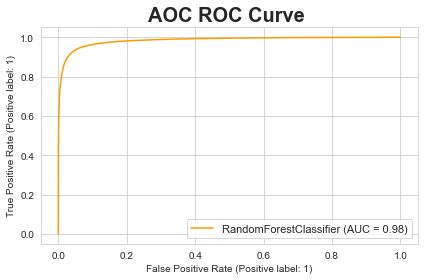

Auc Score :
 0.9423793501836512


In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(rfc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, rfc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## 4. Extra Tree Classifier

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, random_state=62, test_size=.33)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'Extra Trees Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Extra Trees Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Extra Trees Classifier Evaluation


Accuracy Score of Extra Trees Classifier : 0.9502428521780407


Confusion matrix of Extra Trees Classifier : 
 [[56876  2163]
 [ 3707 55227]]


classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     59039
           1       0.96      0.94      0.95     58934

    accuracy                           0.95    117973
   macro avg       0.95      0.95      0.95    117973
weighted avg       0.95      0.95      0.95    117973



#### Cross Validation Extra Tree Classifier

In [97]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(etc, df, Y, cv =5)
print('\033[1m'+'Cross Validation Score', etc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score ExtraTreesClassifier() :

CVScore : [0.94025091 0.96188758 0.96074016 0.96033455 0.96023665]
Mean CV Score : 0.956689971360062
Std deviation : 0.00824043356673422


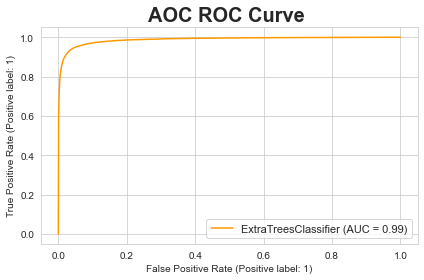

Auc Score :
 0.9502311642170682


In [98]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(etc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, etc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

**Extra Tree classifier gives maximum accuracy and cross validation score.**

># Hyper Parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
print(etc.get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [101]:
parameter= {'criterion' : ['gini', 'entropy'],
           'n_estimators':[75,100,125],
           'max_depth':[None,5,8,10]}

In [102]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START criterion=gini, max_depth=None, n_estimators=75............
[CV 1/5; 1/24] END criterion=gini, max_depth=None, n_estimators=75;, score=0.946 total time=  26.7s
[CV 2/5; 1/24] START criterion=gini, max_depth=None, n_estimators=75............
[CV 2/5; 1/24] END criterion=gini, max_depth=None, n_estimators=75;, score=0.944 total time=  26.5s
[CV 3/5; 1/24] START criterion=gini, max_depth=None, n_estimators=75............
[CV 3/5; 1/24] END criterion=gini, max_depth=None, n_estimators=75;, score=0.944 total time=  26.1s
[CV 4/5; 1/24] START criterion=gini, max_depth=None, n_estimators=75............
[CV 4/5; 1/24] END criterion=gini, max_depth=None, n_estimators=75;, score=0.945 total time=  26.7s
[CV 5/5; 1/24] START criterion=gini, max_depth=None, n_estimators=75............
[CV 5/5; 1/24] END criterion=gini, max_depth=None, n_estimators=75;, score=0.943 total time=  26.4s
[CV 1/5; 2/24] START criterion=gi

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 8, 10],
                         'n_estimators': [75, 100, 125]},
             verbose=10)

In [103]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 125}

In [104]:
GCV.best_score_

0.9445096153659774

## Final Model based on Hyper Parameter

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, random_state=99, test_size=.3)
etc=ExtraTreesClassifier(criterion='entropy', max_features = 'auto',n_estimators= 125 ,max_depth = None )
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'Extra Trees Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Extra Trees Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Extra Trees Classifier Evaluation


Accuracy Score of Extra Trees Classifier : 0.952325451290467


Confusion matrix of Extra Trees Classifier : 
 [[51769  1899]
 [ 3214 50366]]


classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     53668
           1       0.96      0.94      0.95     53580

    accuracy                           0.95    107248
   macro avg       0.95      0.95      0.95    107248
weighted avg       0.95      0.95      0.95    107248



In [106]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(etc, df, Y, cv =5)
print('\033[1m'+'Cross Validation Score of Final Model:', etc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score of Final Model: ExtraTreesClassifier(criterion='entropy', n_estimators=125) :

CVScore : [0.93970545 0.96289459 0.96156536 0.96057232 0.96160732]
Mean CV Score : 0.9572690072448562
Std deviation : 0.008812685569546069


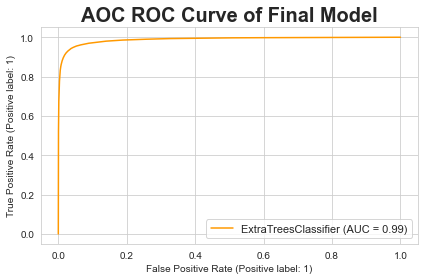

Auc Score :
 0.9523153584437943


In [107]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(etc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, etc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

### Saving model

In [108]:
import joblib
joblib.dump(etc,'Micro Finance Defaulter.pkl')

['Micro Finance Defaulter.pkl']

In [109]:
# Prediction
prediction = etc.predict(X_test)

In [110]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred

,Predicted Values,Actual Values
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
107243,0,0
107244,0,0
107245,1,1
107246,1,1
